# Bankruptcy Detection Model

## The data were collected from the Taiwan Economic Journal for the years 1999 to 2009. Company bankruptcy was defined based on the business regulations of the Taiwan Stock Exchange.

### In this kernel we will use various prediction models to see accurate they are in detecting whether we can correctly predict the company will face the bankruptcy in future.

* 95 features
* 1 vector of labels(Backruptcy?)

In [1]:
# import the necessary labraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from scipy.stats import norm
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import StratifiedShuffleSplit
import xgboost as xgb
from sklearn import tree
from sklearn.svm import SVC
# Use classification_report (lowercase c)
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, precision_score, recall_score, f1_score, roc_auc_score
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import pipeline
from sklearn.ensemble import StackingClassifier, RandomForestClassifier
from mlxtend.classifier import StackingCVClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict, RandomizedSearchCV, KFold, cross_validate
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import RepeatedStratifiedKFold, StratifiedKFold

In [2]:
# Load the dataset
data = pd.read_csv("/content/Bankruptcy Prediction (1).csv")
data.head(10)

Bankrupt?   ROA(C) before interest and depreciation before interest  \
0          1                                           0.370594          
1          1                                           0.464291          
2          1                                           0.426071          
3          1                                           0.399844          
4          1                                           0.465022          
5          1                                           0.388680          
6          0                                           0.390923          
7          0                                           0.508361          
8          0                                           0.488519          
9          0                                           0.495686          

    ROA(A) before interest and % after tax  \
0                                 0.424389   
1                                 0.538214   
2                                 0.499019   
3                                 0.451265   
4                                 0.538432   
5                                 0.415177   
6                                 0.445704   
7                                 0.570922   
8                                 0.545137   
9                                 0.550916   

    ROA(B) before interest and depreciation after tax  \
0                                           0.405750    
1                                           0.516730    
2                                           0.472295    
3                                           0.457733    
4                                           0.522298    
5                                           0.419134    
6                                           0.436158    
7                                           0.559077    
8                                           0.543284    
9                                           0.542963    

    Operating Gross Margin   Realized Sales Gross Margin  \
0                 0.601457                      0.601457   
1                 0.610235                      0.610235   
2                 0.601450                      0.601364   
3                 0.583541                      0.583541   
4                 0.598783                      0.598783   
5                 0.590171                      0.590251   
6                 0.619950                      0.619950   
7                 0.601738                      0.601717   
8                 0.603612                      0.603612   
9                 0.599209                      0.599209   

    Operating Profit Rate   Pre-tax net Interest Rate  \
0                0.998969                    0.796887   
1                0.998946                    0.797380   
2                0.998857                    0.796403   
3                0.998700                    0.796967   
4                0.998973                    0.797366   
5                0.998758                    0.796903   
6                0.998993                    0.797012   
7                0.999009                    0.797449   
8                0.998961                    0.797414   
9                0.999001                    0.797404   

    After-tax net Interest Rate   Non-industry income and expenditure/revenue  \
0                      0.808809                                      0.302646   
1                      0.809301                                      0.303556   
2                      0.808388                                      0.302035   
3                      0.808966                                      0.303350   
4                      0.809304                                      0.303475   
5                      0.808771                                      0.303116   
6                      0.808960                                      0.302814   
7                      0.809362                                      0.303545   
8                      0.809338    

In [3]:
# checking the shape of dataframe
data.shape

(6819, 96)

In [4]:
# lets checking the data type in dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

### in the result we can see our dataframe's data types and we understand the nature of our data. now we also checking any null values or duplicated values in the dataframe.

We can clearly see in dataframe columns have the numerical values so there no need to convert.

In [5]:
# Computing the descriptive statistics of our numerical feature
data.describe()

Bankrupt?   ROA(C) before interest and depreciation before interest  \
count  6819.000000                                        6819.000000          
mean      0.032263                                           0.505180          
std       0.176710                                           0.060686          
min       0.000000                                           0.000000          
25%       0.000000                                           0.476527          
50%       0.000000                                           0.502706          
75%       0.000000                                           0.535563          
max       1.000000                                           1.000000          

        ROA(A) before interest and % after tax  \
count                              6819.000000   
mean                                  0.558625   
std                                   0.065620   
min                                   0.000000   
25%                                   0.535543   
50%                                   0.559802   
75%                                   0.589157   
max                                   1.000000   

        ROA(B) before interest and depreciation after tax  \
count                                        6819.000000    
mean                                            0.553589    
std                                             0.061595    
min                                             0.000000    
25%                                             0.527277    
50%                                             0.552278    
75%                                             0.584105    
max                                             1.000000    

        Operating Gross Margin   Realized Sales Gross Margin  \
count              6819.000000                   6819.000000   
mean                  0.607948                      0.607929   
std                   0.016934                      0.016916   
min                   0.000000                      0.000000   
25%                   0.600445                      0.600434   
50%                   0.605997                      0.605976   
75%                   0.613914                      0.613842   
max                   1.000000                      1.000000   

        Operating Profit Rate   Pre-tax net Interest Rate  \
count             6819.000000                 6819.000000   
mean                 0.998755                    0.797190   
std                  0.013010                    0.012869   
min                  0.000000                    0.000000   
25%                  0.998969                    0.797386   
50%                  0.999022                    0.797464   
75%                  0.999095                    0.797579   
max                  1.000000                    1.000000   

        After-tax net Interest Rate  \
count                   6819.000000   
mean                       0.809084   
std                        0.013601   
min                        0.000000   
25%                        0.809312   
50%                        0.809375   
75%                        0.809469   
max                        1.000000   

        Non-industry income and expenditure/revenue  ...  \
count                                   6819.000000  ...   
mean                                       0.303623  ...   
std                                        0.011163  ...   
min                                        0.000000  ...   
25%                                        0.303466  ...   
50%                                        0.303525  ...   
75%                                        0.303585  ...   
max                                        1.000000  ...   

        Net Income to Total Assets   Total assets to GNP price  \
count                  6819.000000                6.819000e+03   
mean                      0.807760                1.862942e+07   
std                       0.040332                3.764501e+08   
min

In [6]:
# lets check any null values
data.isnull().sum()

Bankrupt?                                                   0
 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 ROA(B) before interest and depreciation after tax          0
 Operating Gross Margin                                     0
                                                           ..
 Liability to Equity                                        0
 Degree of Financial Leverage (DFL)                         0
 Interest Coverage Ratio (Interest expense to EBIT)         0
 Net Income Flag                                            0
 Equity to Liability                                        0
Length: 96, dtype: int64

In [7]:
# lets check any duplicated values in the dataframe
data.duplicated().sum()

0

### By passing this codes now we can see here is not a null and duplicated values in our dataframe. A further considaration needs to bo done on the possibility to have duplicates in our dataframe and need to be dropped.

In [8]:
# checking nan presence
[print(col)for col in data if data[col].isna().sum()>0]

[]

In [9]:
# value counts of the bankrupt? columns
data['Bankrupt?'].value_counts()

Bankrupt?
0    6599
1     220
Name: count, dtype: int64

### There is bankrupt columns have values of 1 = 220 that means there is chance to bankrupt of company and 0 = 6599 that means not chance to bankrupt of company.

In [10]:
# Lets see the the percentage chance to become bankrupt of companies
print("Financial stable: " , round(data['Bankrupt?'].value_counts()[0]/len(data)*100,2), "% of the dataset" )
print("Financial Unstable: " , round(data['Bankrupt?'].value_counts()[1]/len(data)*100,2), "% of the dataset" )

Financial stable:  96.77 % of the dataset
Financial Unstable:  3.23 % of the dataset


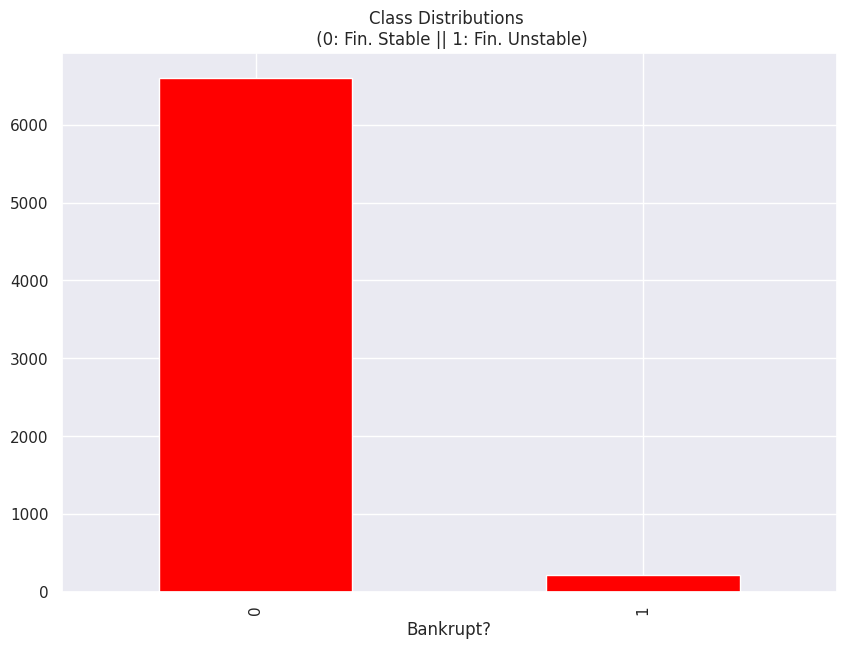

In [11]:
# Checking labels distributions

sns.set_theme(context = 'notebook')

plt.figure(figsize = (10,7))
data['Bankrupt?'].value_counts().plot(kind="bar", color = 'red')
plt.title('Class Distributions \n (0: Fin. Stable || 1: Fin. Unstable)')
plt.show()

### above the countplot we see how labels are strongly unbalanced and this is a obstacle therefor we need to solve to obtain good performances of the model prediction.

# Exploratory Data Analysis (EDA)

lets explore our dataframe to gain as much information as possible from several types of visualizations.

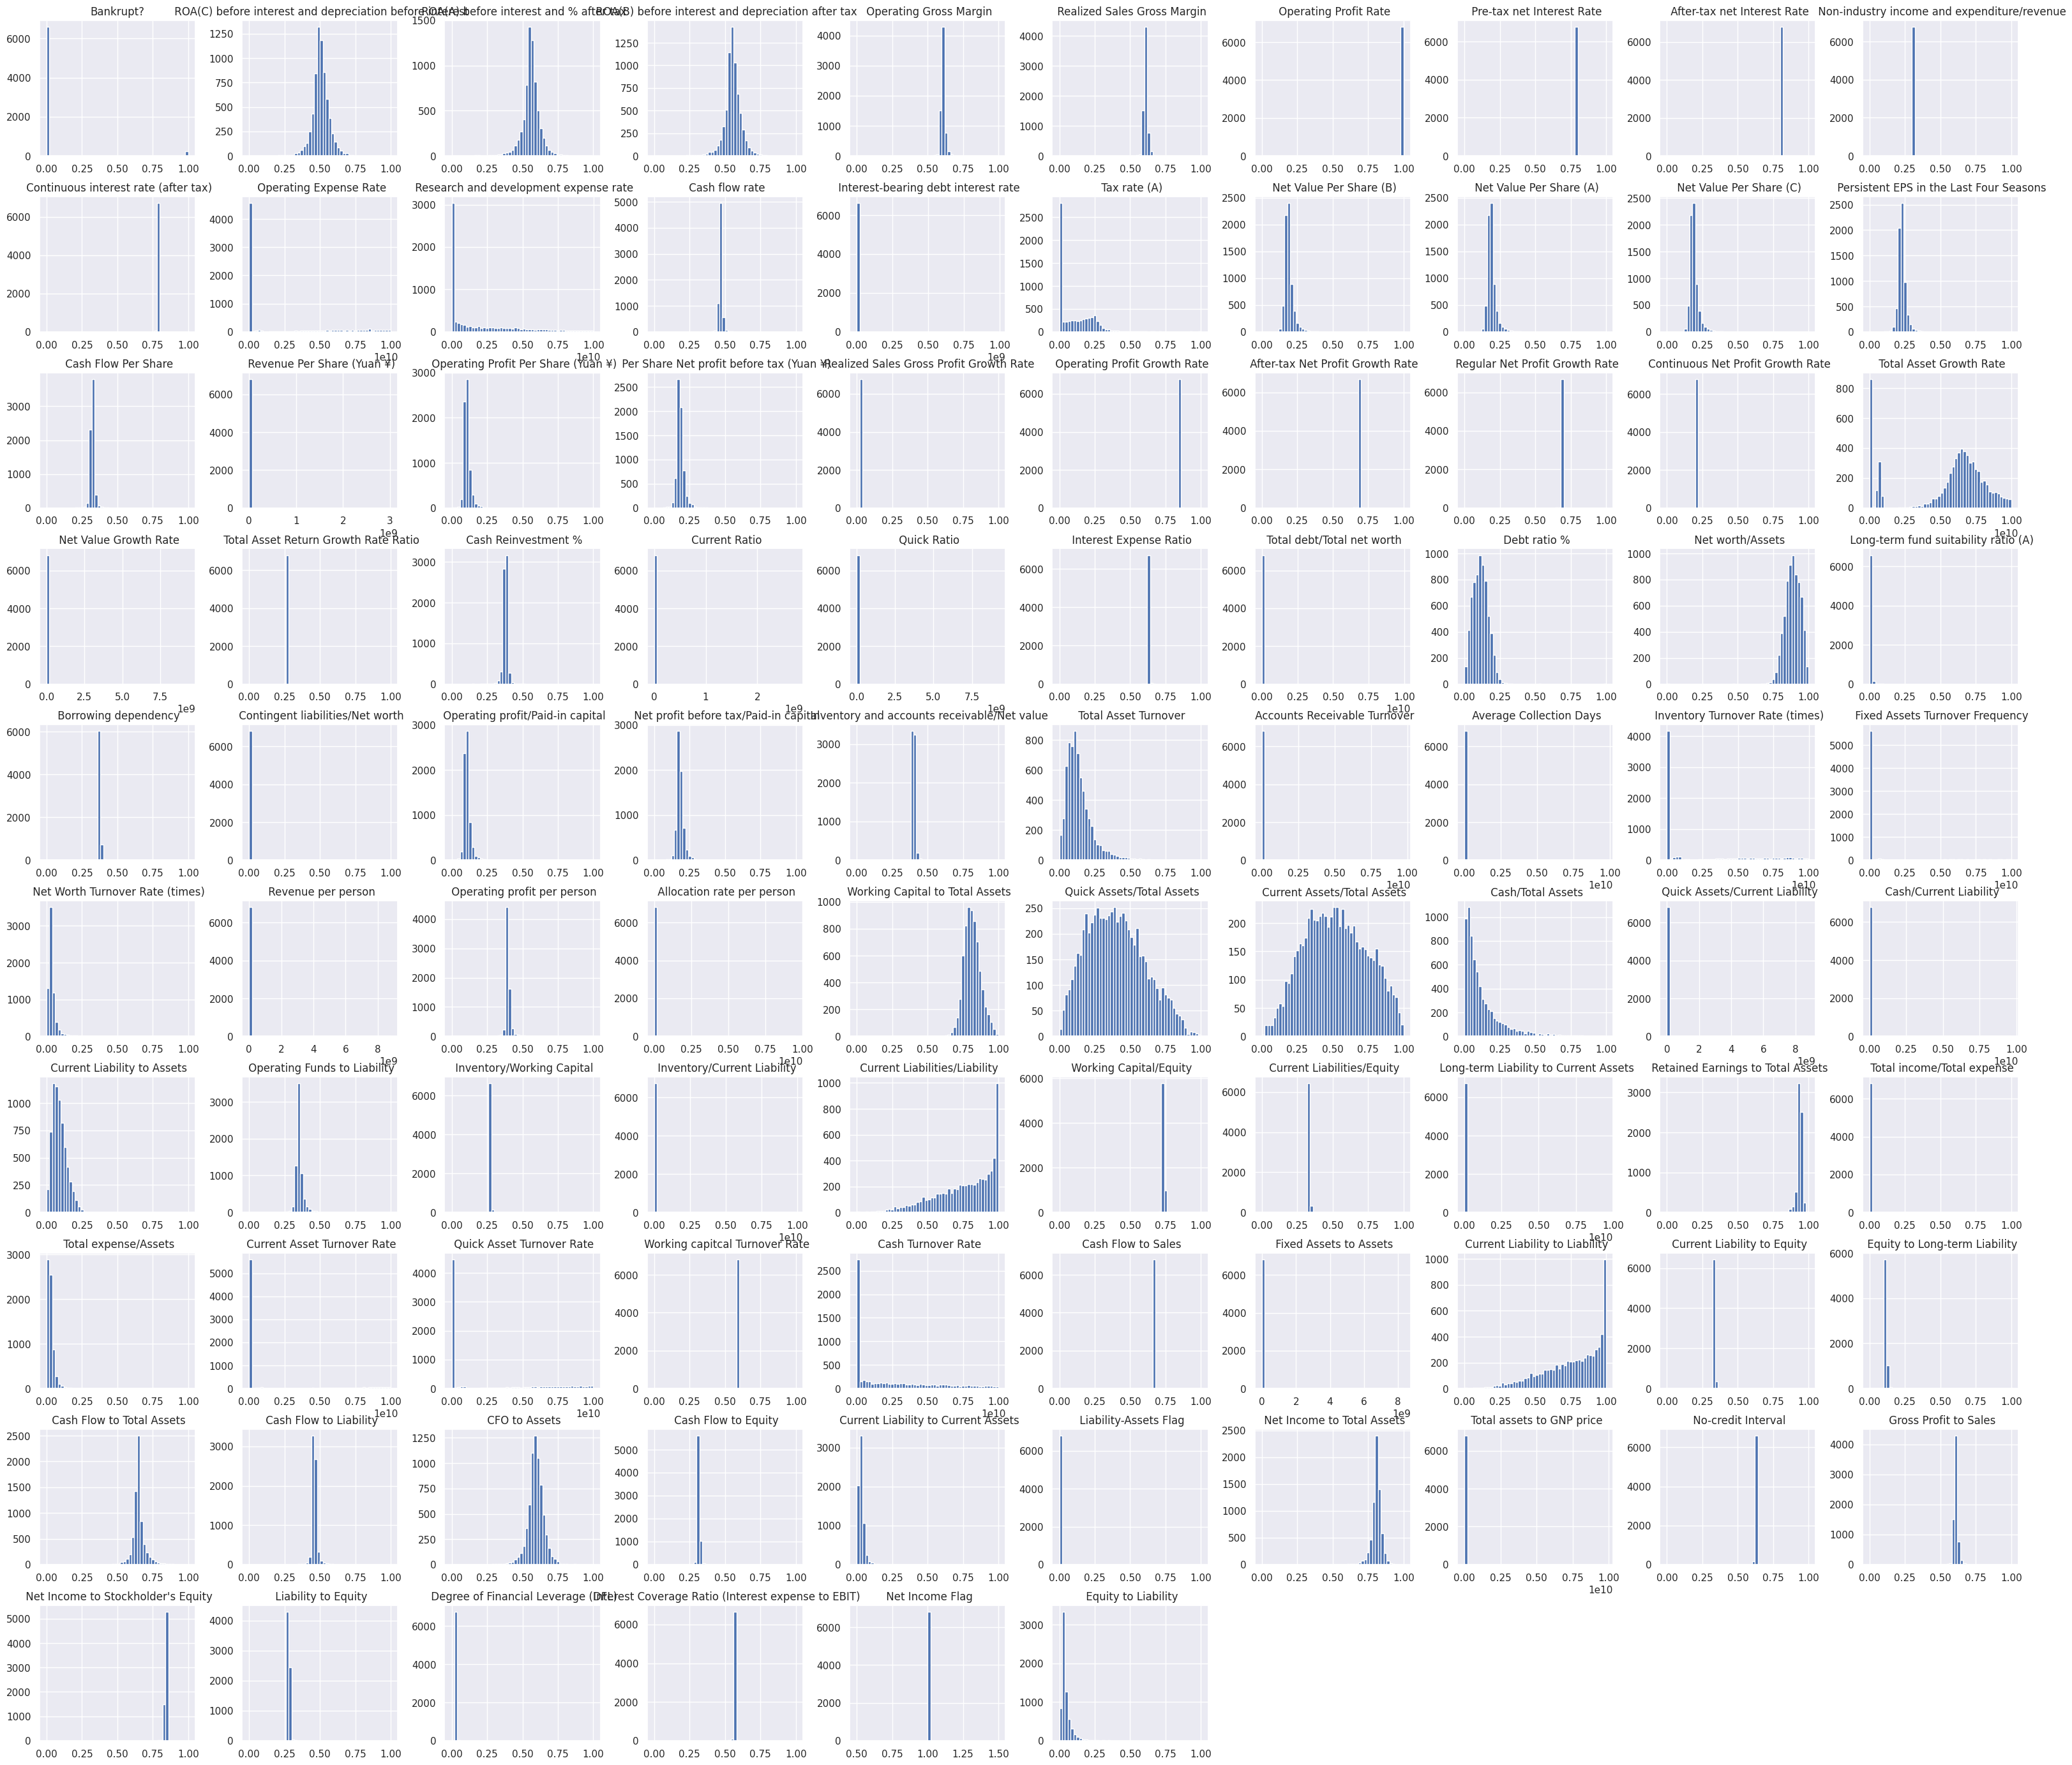

In [12]:
# lets visualization histogram of numerical datas
data.hist(bins=50, figsize=(40,35))
plt.show()

BY this histogram we can see the all columns and their histogram of data values and distribution.

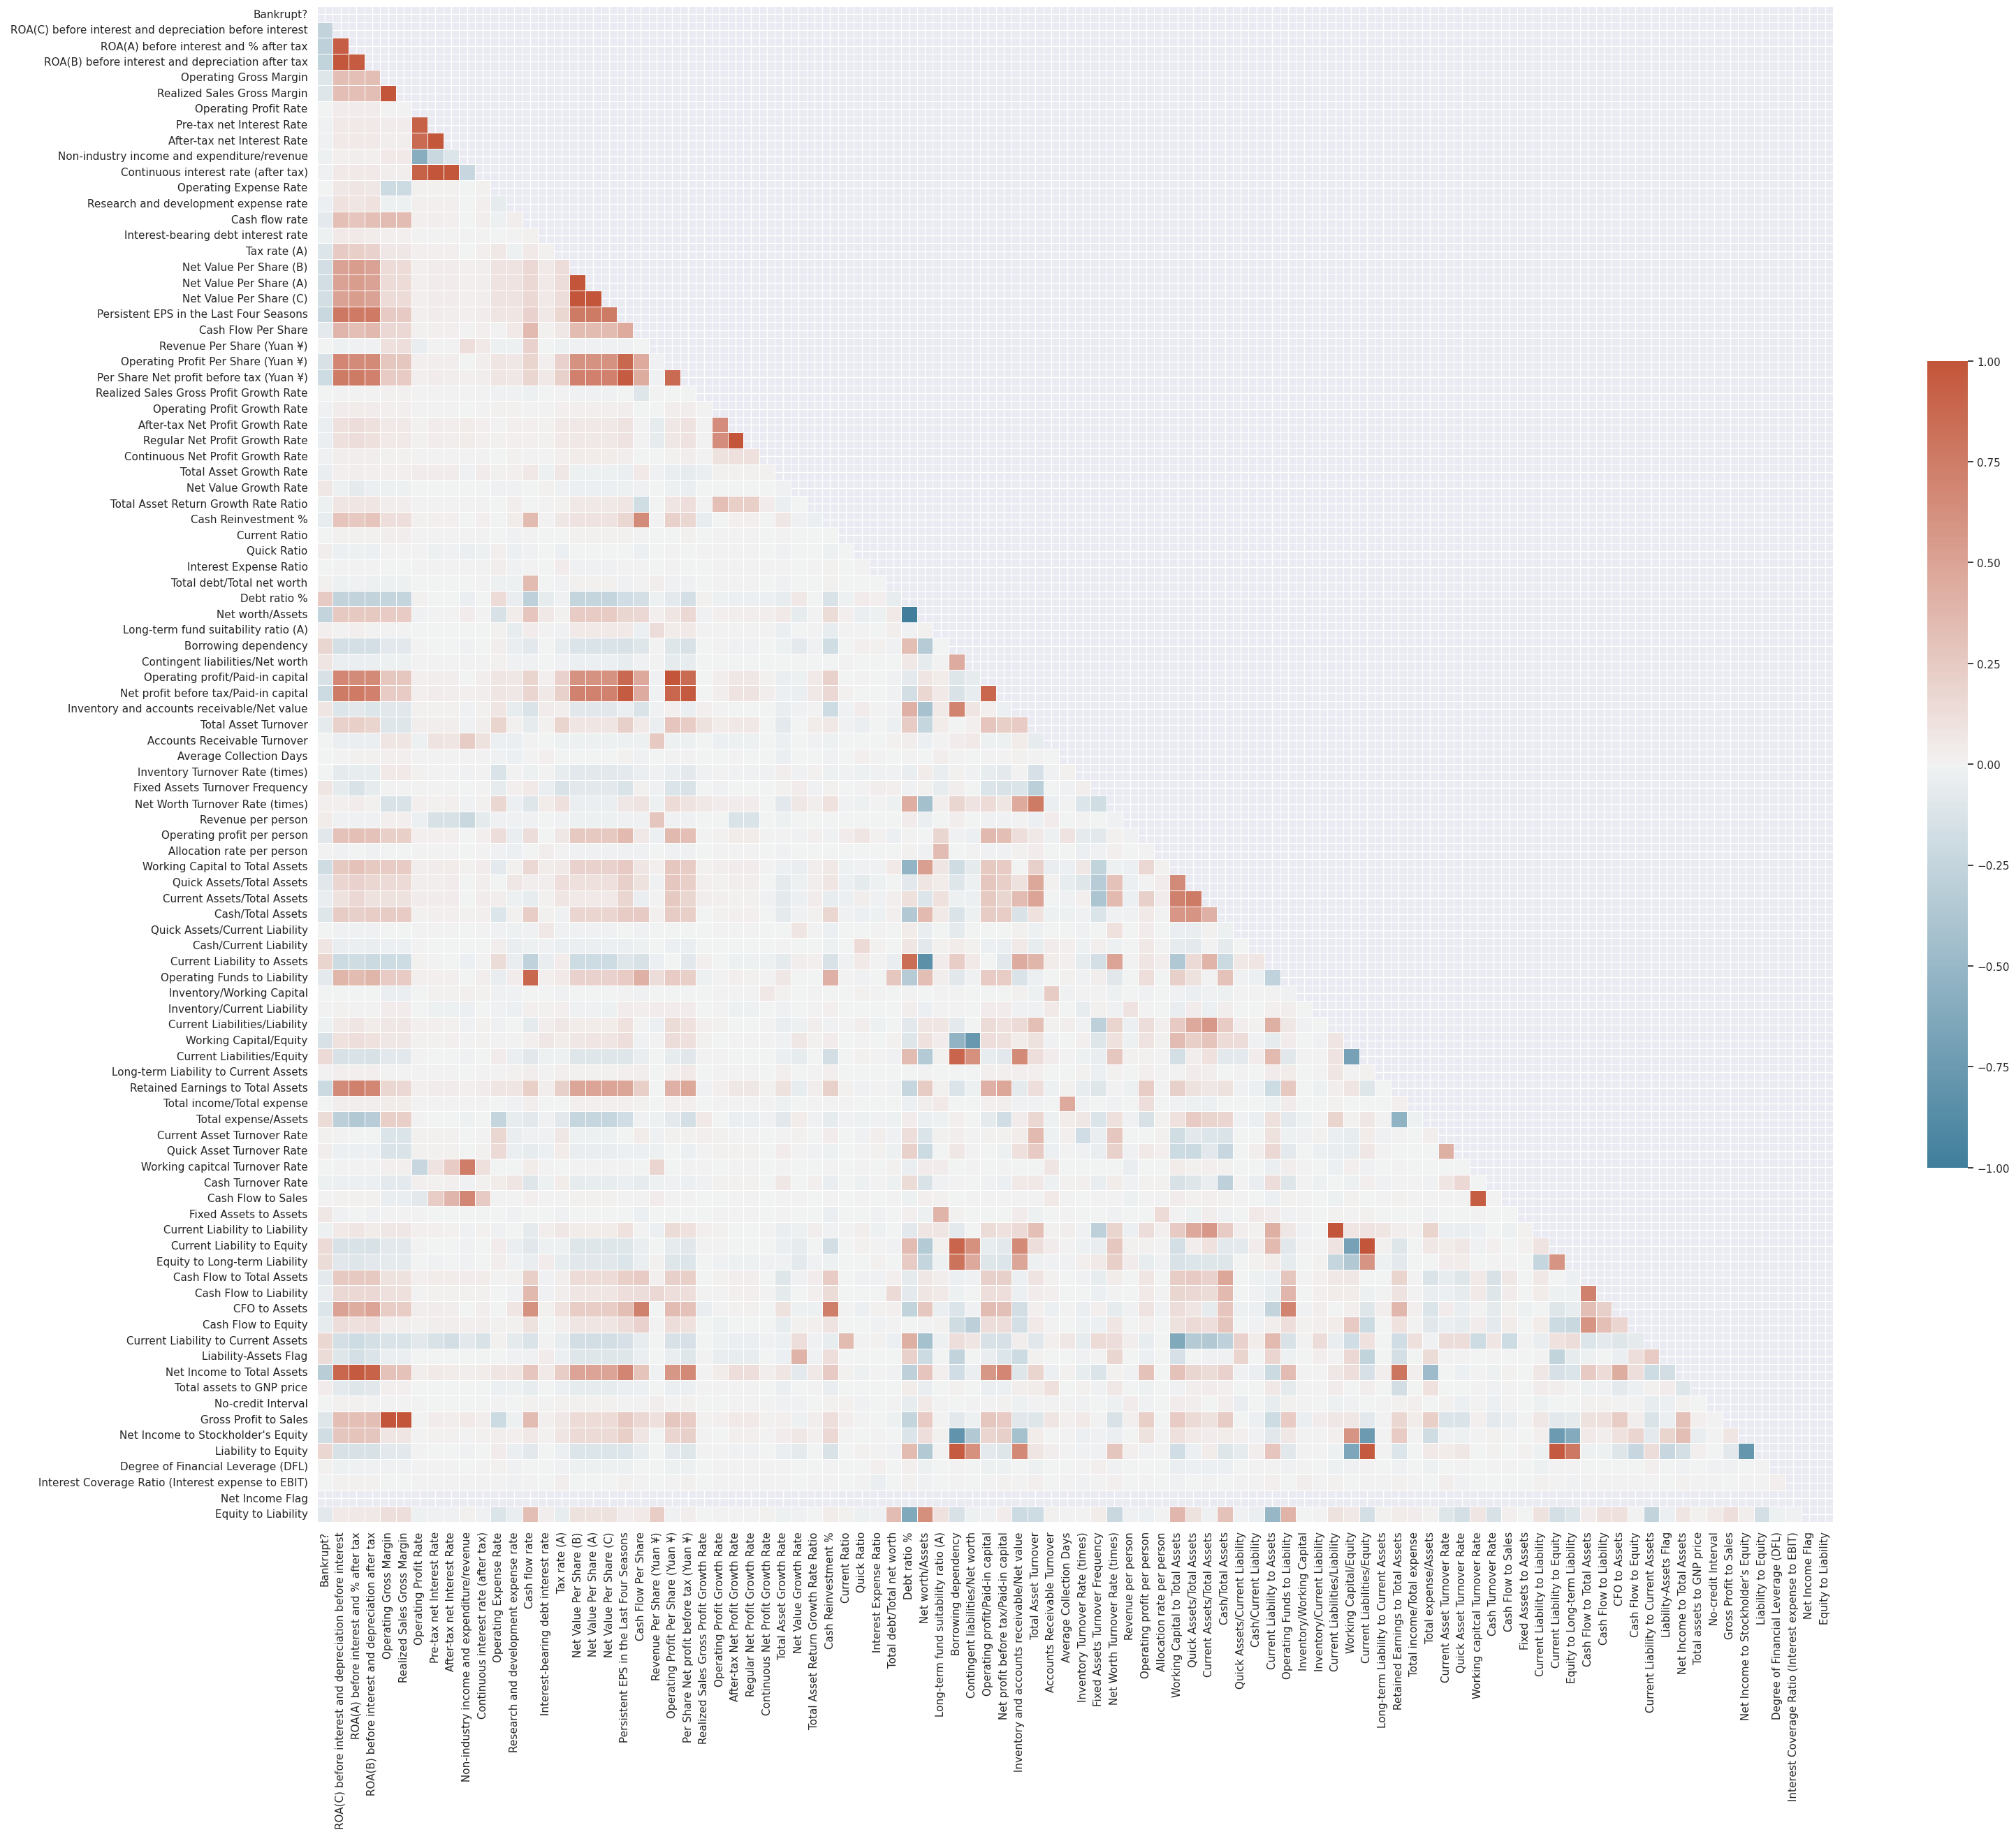

In [13]:
# lets create a heatmap for looking the relationships between the columns.
f, ax= plt.subplots(figsize=(35,30))
mat = data.corr()
mask = np.triu(np.ones_like(mat, dtype = bool))
cmap= sns.diverging_palette(230,20, as_cmap=True)
sns.heatmap(mat, mask= mask, cmap=cmap, vmax=1, center=0, square=True,linewidths=0.5,
            cbar_kws={"shrink": 0.5})
plt.show()

By this heatmap we can see the correlation between the columns.

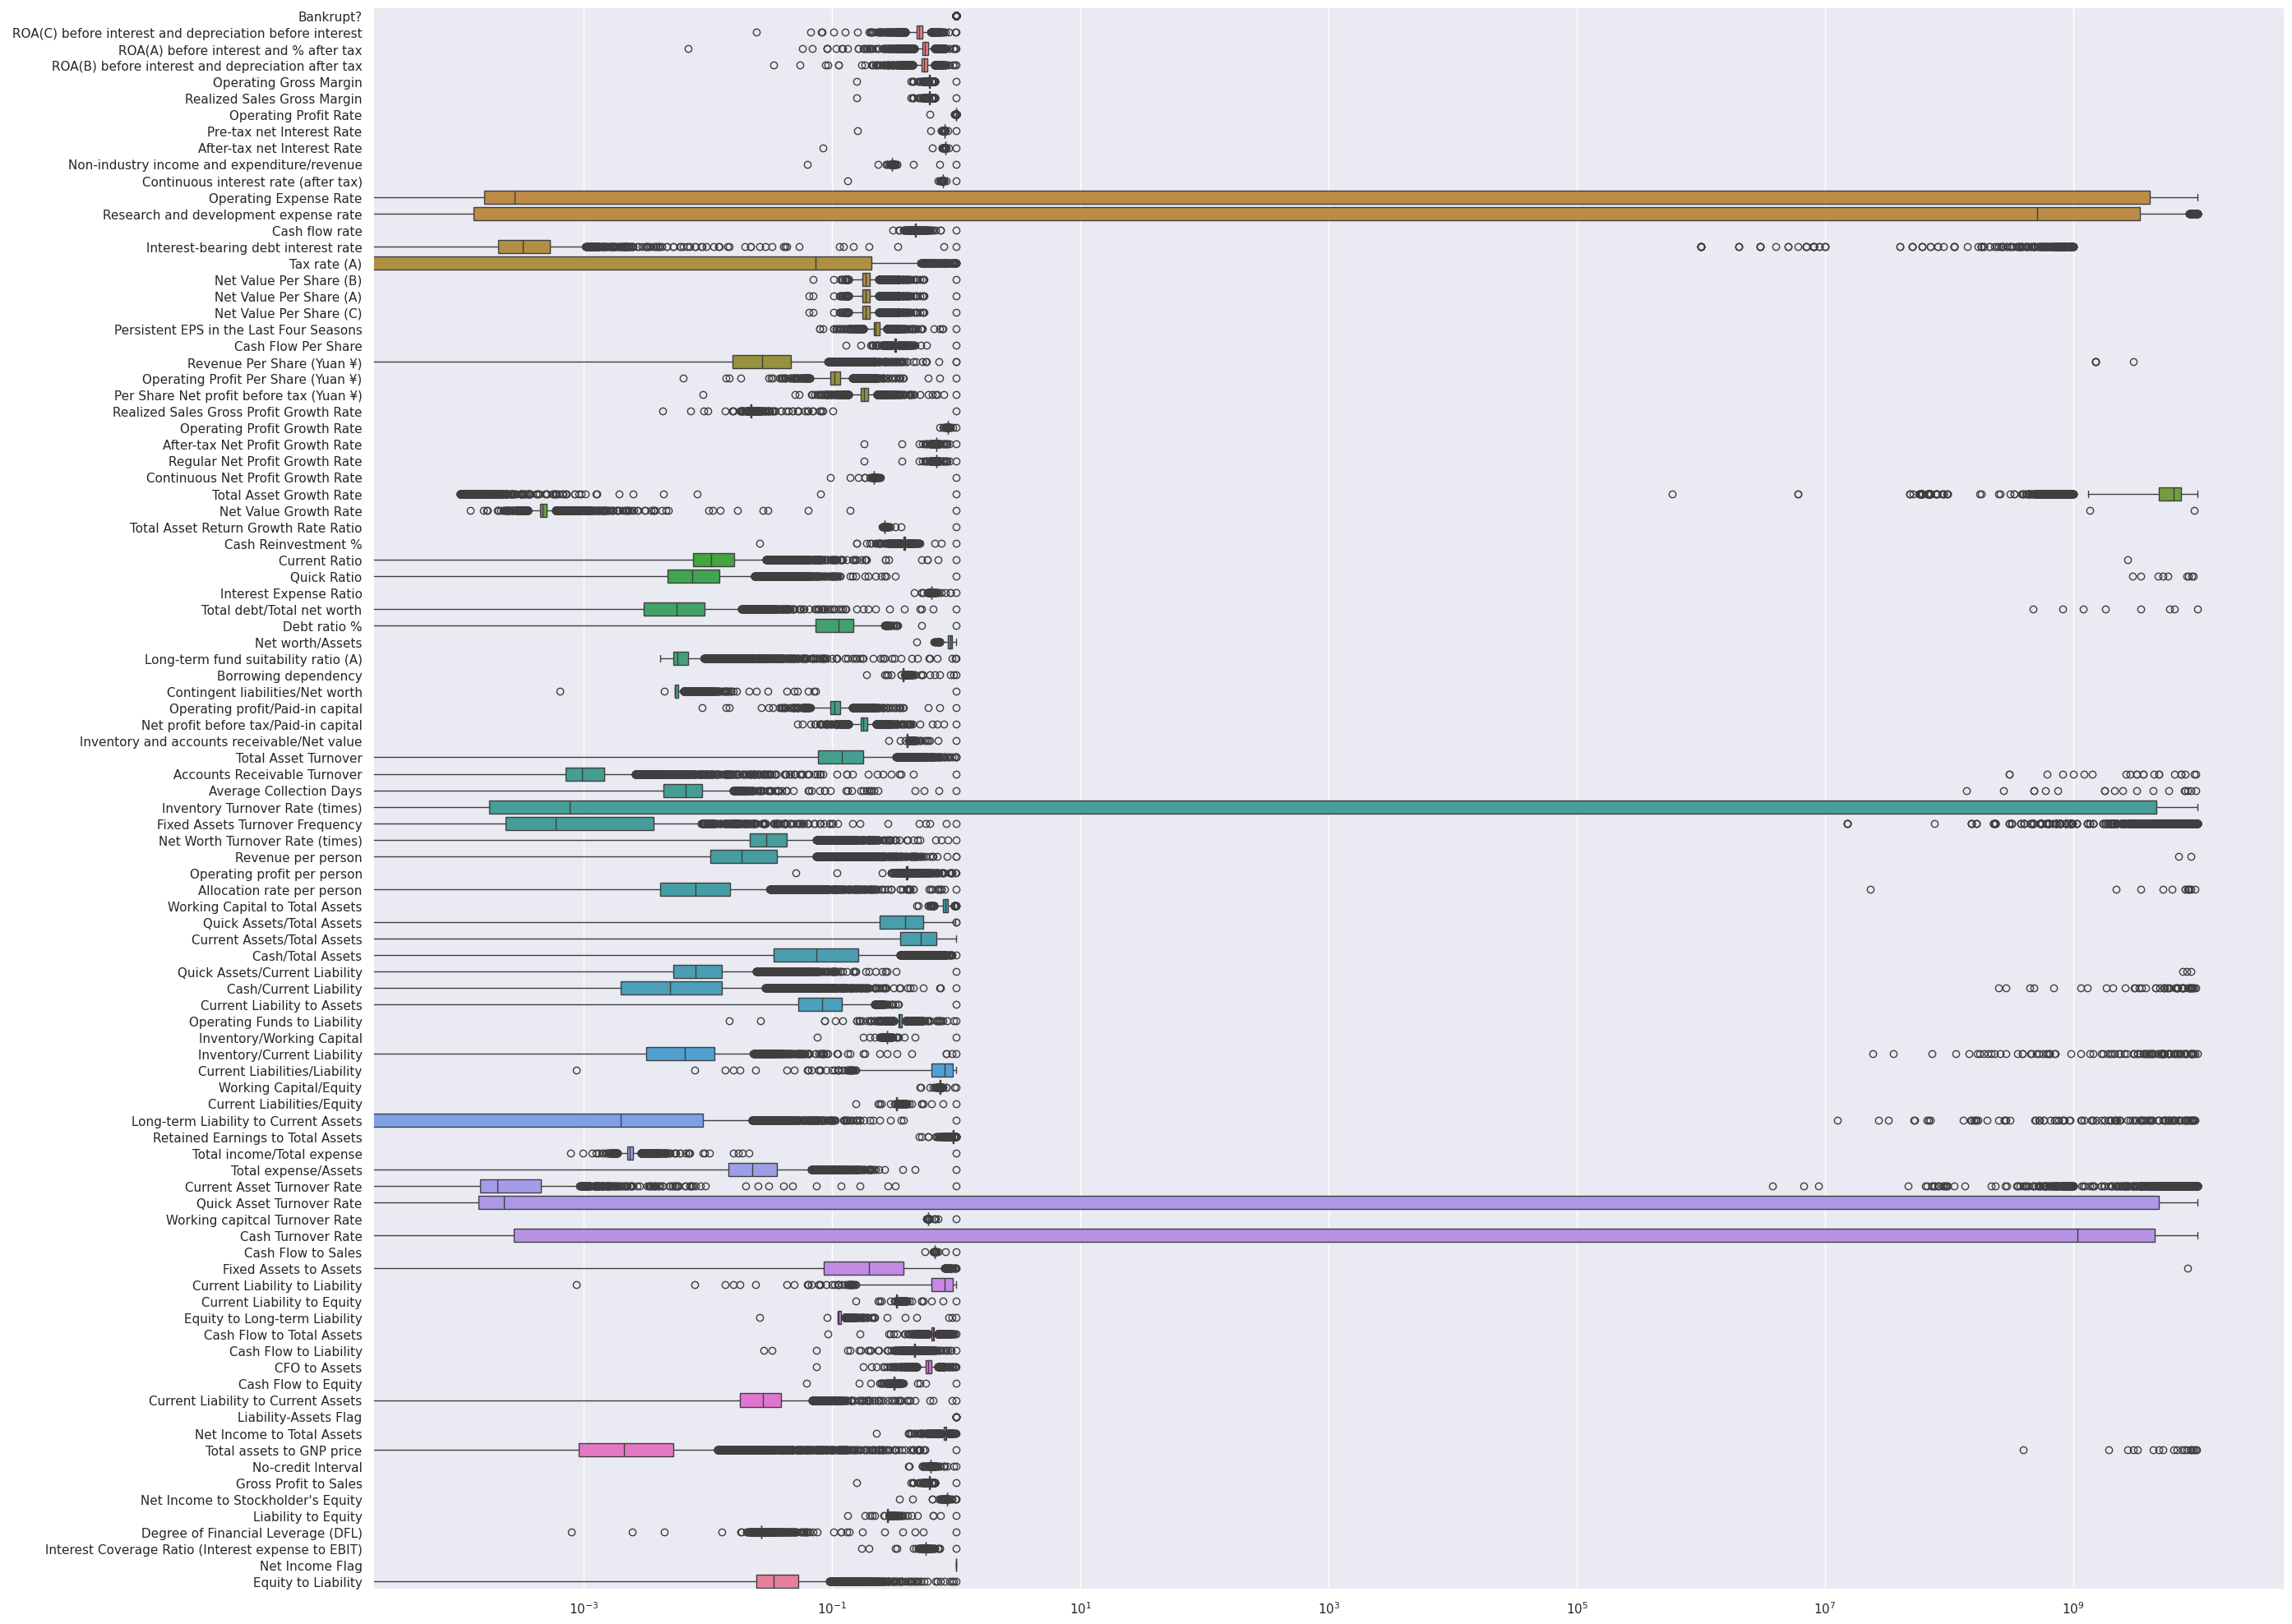

In [14]:
# lets plot the boxplot for looking the outliers in dataframe
plt.figure(figsize=(30,25))
ax = sns.boxplot(data=data, orient="h") # Change variable name to ax
ax.set(xscale="log") # Use xscale parameter within set()
plt.show()

### Lets plotting the interesting features like net income to total assets and total debt/ total net worth columns.

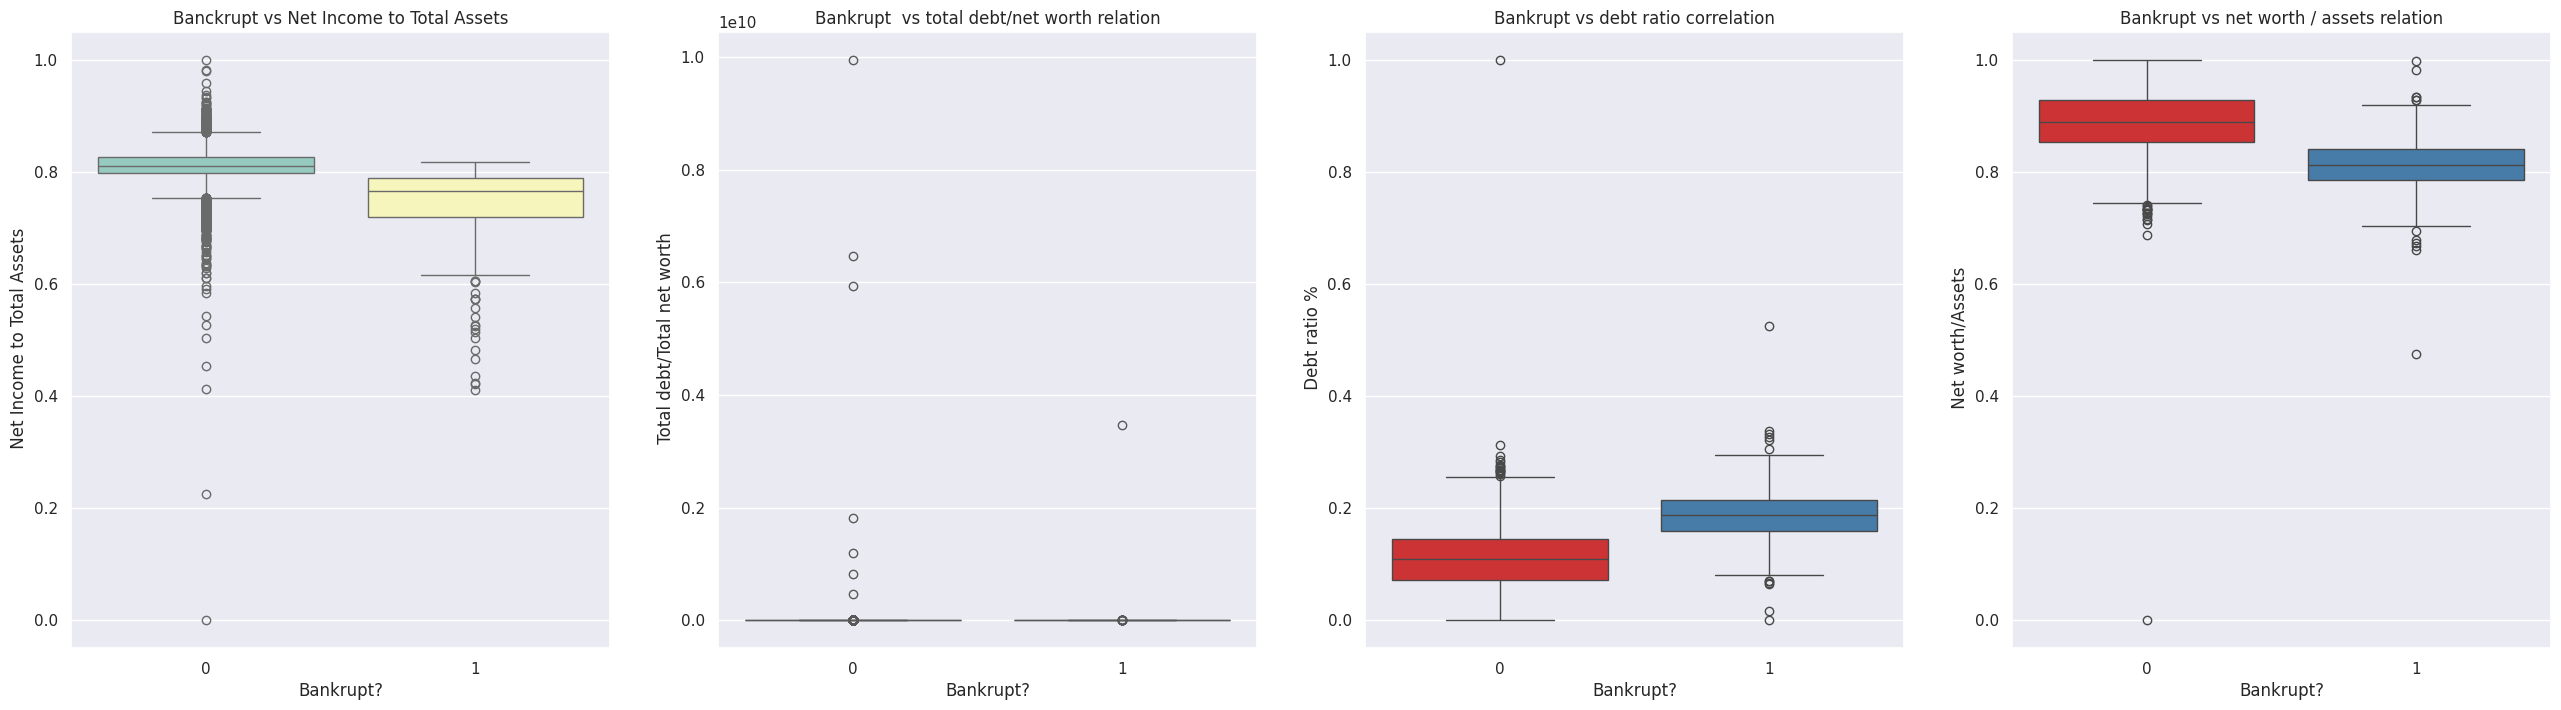

In [15]:
f, axes = plt.subplots(ncols=4, figsize=(32,8))
sns.boxplot(x="Bankrupt?", y=" Net Income to Total Assets", data= data, ax=axes[0], palette="Set3") # Added a space before Net Income
axes[0].set_title("Banckrupt vs Net Income to Total Assets")

sns.boxplot(x="Bankrupt?", y=" Total debt/Total net worth", data= data, ax=axes[1], palette="Set2") # Added a space before Total debt
axes[1].set_title("Bankrupt  vs total debt/net worth relation")

sns.boxplot(x="Bankrupt?",y=" Debt ratio %", data=data, ax=axes[2], palette="Set1") # Added a space before Debt ratio
axes[2].set_title("Bankrupt vs debt ratio correlation")

sns.boxplot(x="Bankrupt?",y=" Net worth/Assets", data=data, ax=axes[3], palette="Set1") # Added a space before Net worth
axes[3].set_title("Bankrupt vs net worth / assets relation")
plt.show()

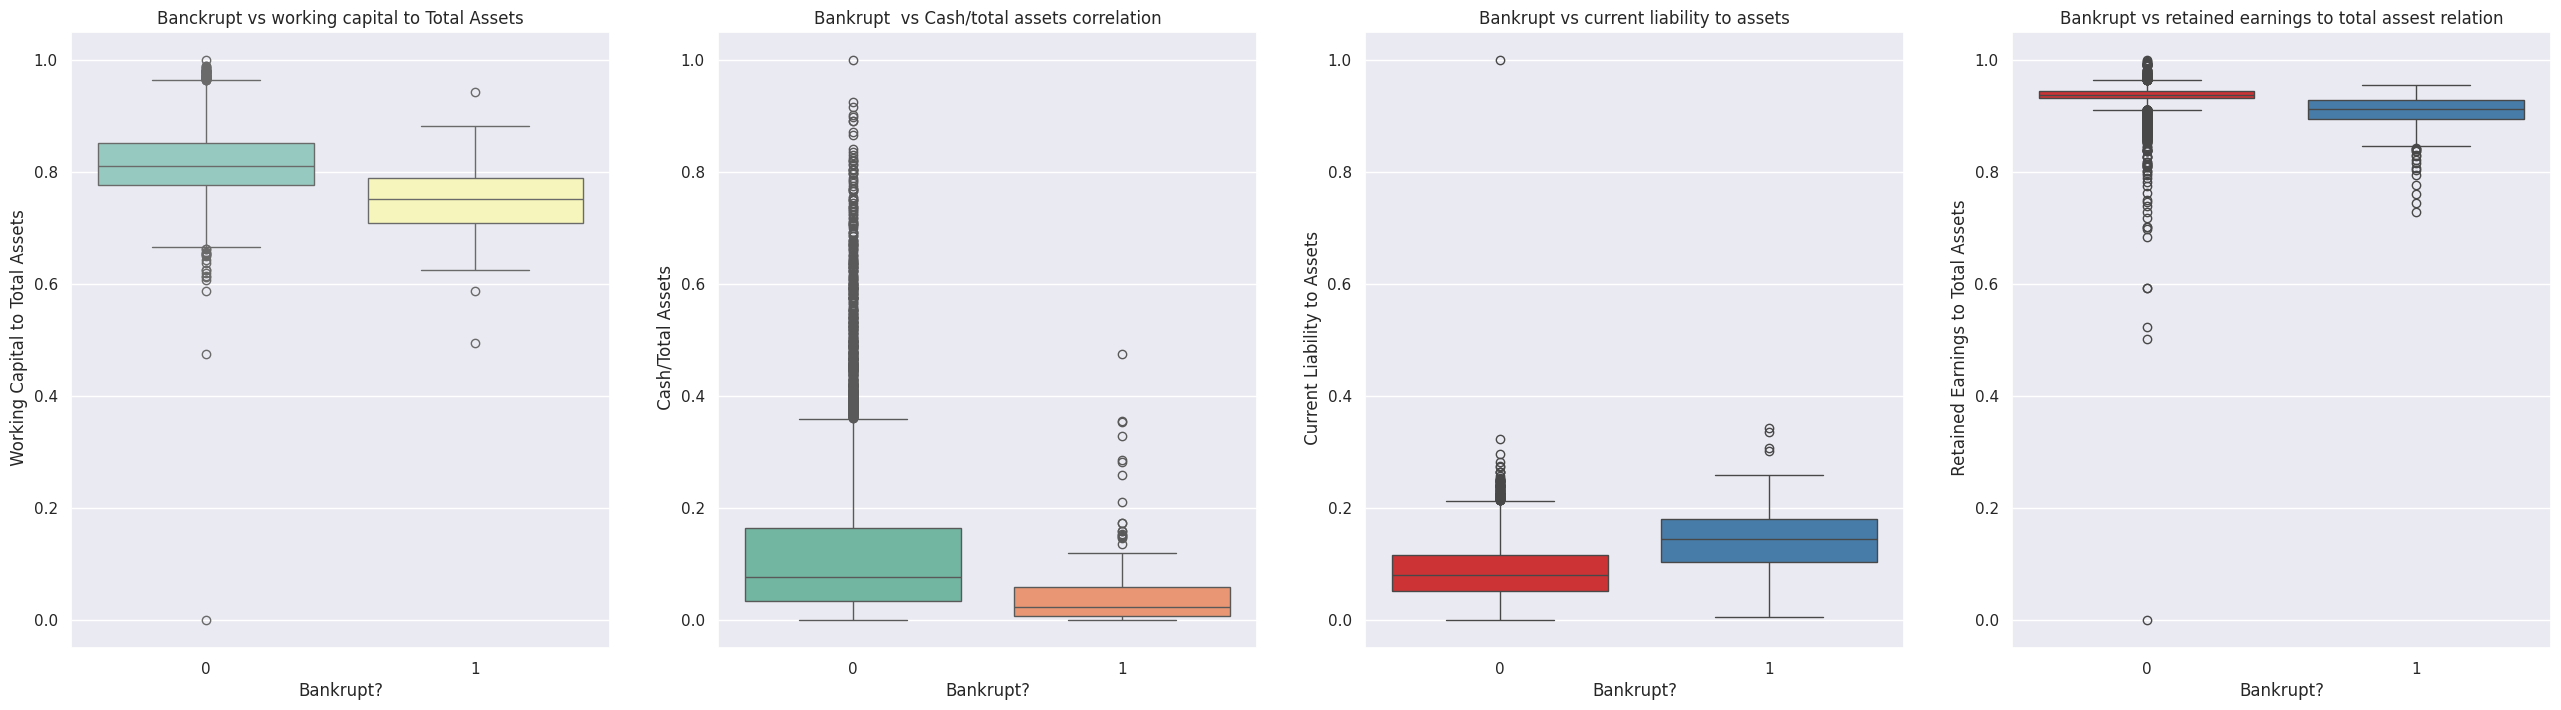

In [16]:
f, axes = plt.subplots(ncols=4, figsize=(32,8))
sns.boxplot(x="Bankrupt?", y=" Working Capital to Total Assets", data= data, ax=axes[0], palette="Set3") # Added a space before Net Income
axes[0].set_title("Banckrupt vs working capital to Total Assets")

sns.boxplot(x="Bankrupt?", y=" Cash/Total Assets", data= data, ax=axes[1], palette="Set2") # Added a space before Total debt
axes[1].set_title("Bankrupt  vs Cash/total assets correlation")

sns.boxplot(x="Bankrupt?",y=" Current Liability to Assets", data=data, ax=axes[2], palette="Set1") # Added a space before Debt ratio
axes[2].set_title("Bankrupt vs current liability to assets")

sns.boxplot(x="Bankrupt?",y=" Retained Earnings to Total Assets", data=data, ax=axes[3], palette="Set1") # Added a space before Net worth
axes[3].set_title("Bankrupt vs retained earnings to total assest relation")
plt.show()

Now we can plot the distribuution plot for knowing the data distribution of bankruptcy dataset.

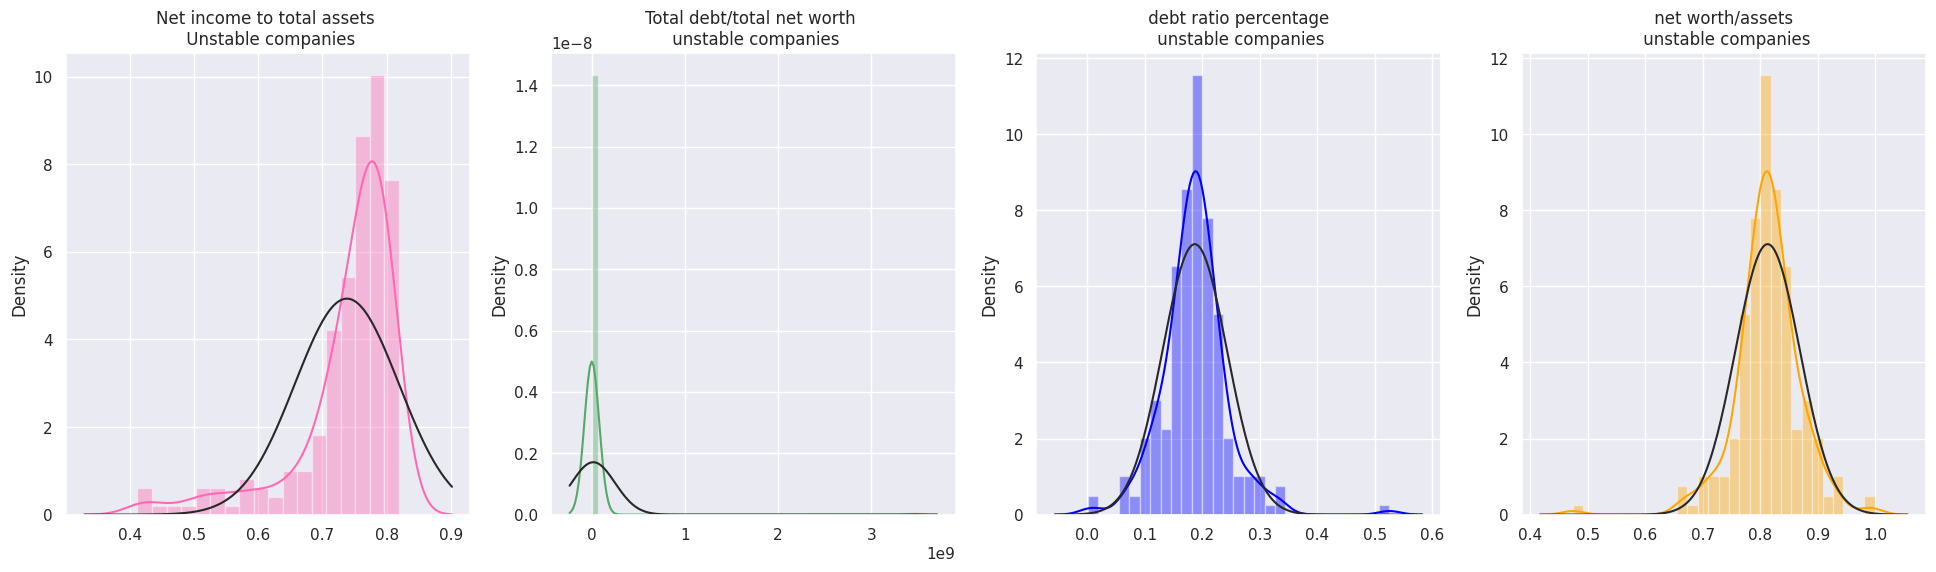

In [17]:
plt.figure(figsize=(24,6))

plt.subplot(1,4,1)
sns.distplot((data[' Net Income to Total Assets'].loc[data['Bankrupt?']==1].values),color='Hotpink',fit=norm)
plt.title("Net income to total assets \n Unstable companies")

plt.subplot(1,4,2)
sns.distplot((data[' Total debt/Total net worth'].loc[data["Bankrupt?"]==1].values),color="g",fit=norm)
plt.title("Total debt/total net worth \n unstable companies")

plt.subplot(1,4,3)
sns.distplot((data[' Debt ratio %'].loc[data["Bankrupt?"]==1].values),color="blue",fit=norm)
plt.title(" debt ratio percentage \n unstable companies")

plt.subplot(1,4,4)
sns.distplot((data[' Net worth/Assets'].loc[data["Bankrupt?"]==1].values),color="orange",fit=norm)
plt.title(" net worth/assets \n unstable companies")
plt.show()

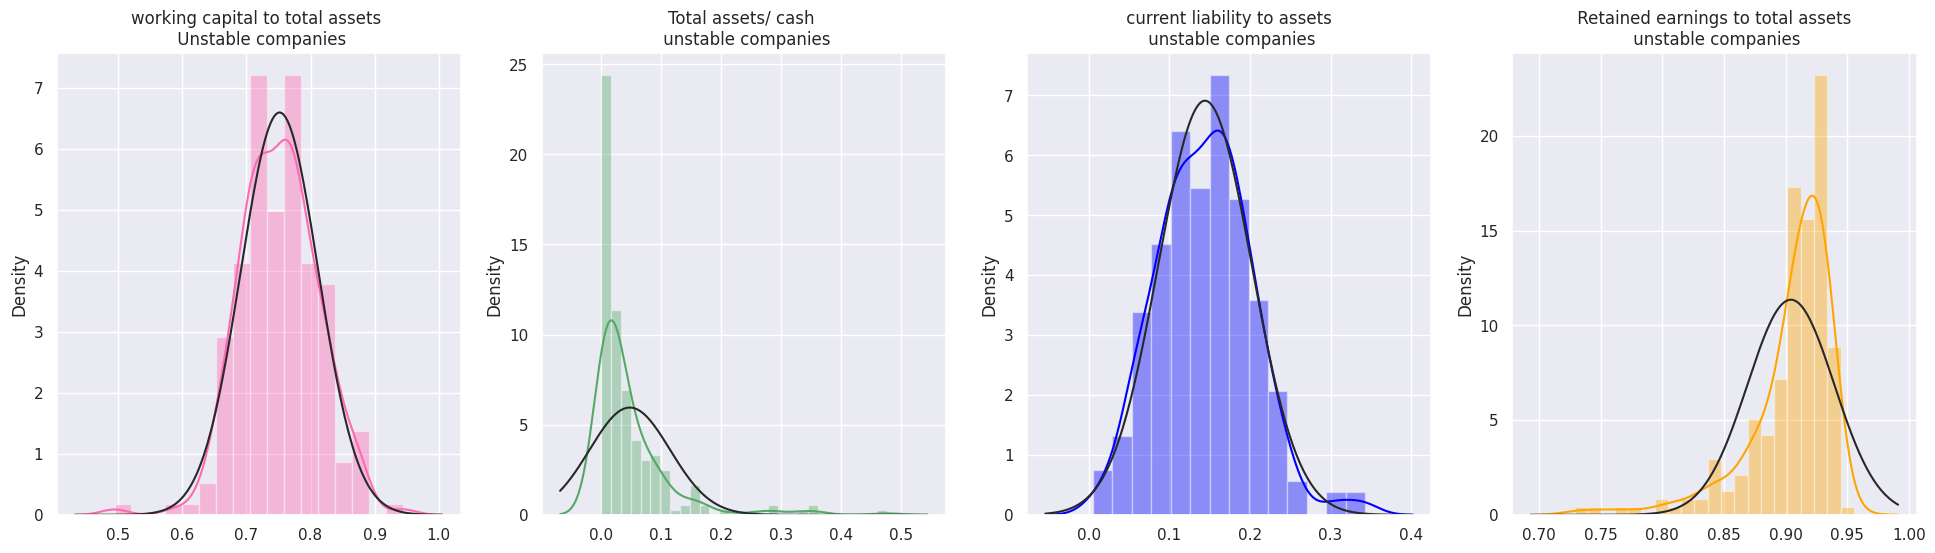

In [18]:
plt.figure(figsize=(24,6))

plt.subplot(1,4,1)
sns.distplot((data[' Working Capital to Total Assets'].loc[data['Bankrupt?']==1].values),color='Hotpink',fit=norm)
plt.title("working capital to total assets \n Unstable companies")

plt.subplot(1,4,2)
sns.distplot((data[' Cash/Total Assets'].loc[data["Bankrupt?"]==1].values),color="g",fit=norm)
plt.title("Total assets/ cash \n unstable companies")

plt.subplot(1,4,3)
sns.distplot((data[' Current Liability to Assets'].loc[data["Bankrupt?"]==1].values),color="blue",fit=norm)
plt.title(" current liability to assets \n unstable companies")

plt.subplot(1,4,4)
sns.distplot((data[' Retained Earnings to Total Assets'].loc[data["Bankrupt?"]==1].values),color="orange",fit=norm)
plt.title(" Retained earnings to total assets \n unstable companies")
plt.show()

## After plotting the distribution plot and boxplot can clearly see there too many outlier in this dataframe so impute these with mean or median

# def the Outliers removel

In [19]:
 # remove outliers
def remove_outlier(feature, feature_name,dataset):
  # locate 25th & 75 th Quartiles
  q25,q75 = np.percentile(feature,25),np.percentile(feature,75)
  print('Quartile 25 : {} | Qaurtile 75 : {}'.format(q25,q75))
  # calculate iqr
  feat_iqr = q75-q25
  print("iqr : {}".format(feat_iqr))

  # calculate min and max
  feat_cut_off = feat_iqr*1.5
  feat_lower,feat_upper= q25-feat_cut_off,q75+feat_cut_off
  print("cut Off : {}".format(feat_cut_off))
  print(feature_name + " lower: {}".format(feat_lower))
  print(feature_name + " Upper: {}".format(feat_upper))

  outliers = [x for x in feature if x < feat_lower or x > feat_upper]
  print(feature_name + " outliers for close to bankruptcy cases : {}".format(len(outliers)))

  dataset = dataset.drop(dataset[(dataset[feature_name]> feat_upper) | (dataset[feature_name]< feat_lower)].index)
  print("-"*65)

  return dataset

for col in data:
  new_data = remove_outlier(data[col],str(col),data)

Quartile 25 : 0.0 | Qaurtile 75 : 0.0
iqr : 0.0
cut Off : 0.0
Bankrupt? lower: 0.0
Bankrupt? Upper: 0.0
Bankrupt? outliers for close to bankruptcy cases : 220
-----------------------------------------------------------------
Quartile 25 : 0.476527080388047 | Qaurtile 75 : 0.535562813825379
iqr : 0.05903573343733198
cut Off : 0.08855360015599797
 ROA(C) before interest and depreciation before interest lower: 0.38797348023204903
 ROA(C) before interest and depreciation before interest Upper: 0.624116413981377
 ROA(C) before interest and depreciation before interest outliers for close to bankruptcy cases : 391
-----------------------------------------------------------------
Quartile 25 : 0.53554295682512 | Qaurtile 75 : 0.58915721761884
iqr : 0.05361426079372
cut Off : 0.08042139119058
 ROA(A) before interest and % after tax lower: 0.45512156563454
 ROA(A) before interest and % after tax Upper: 0.66957860880942
 ROA(A) before interest and % after tax outliers for close to bankruptcy case

## Now we have new dataframe and this dataframe is cleaned

### let's look at cleaned boxplots

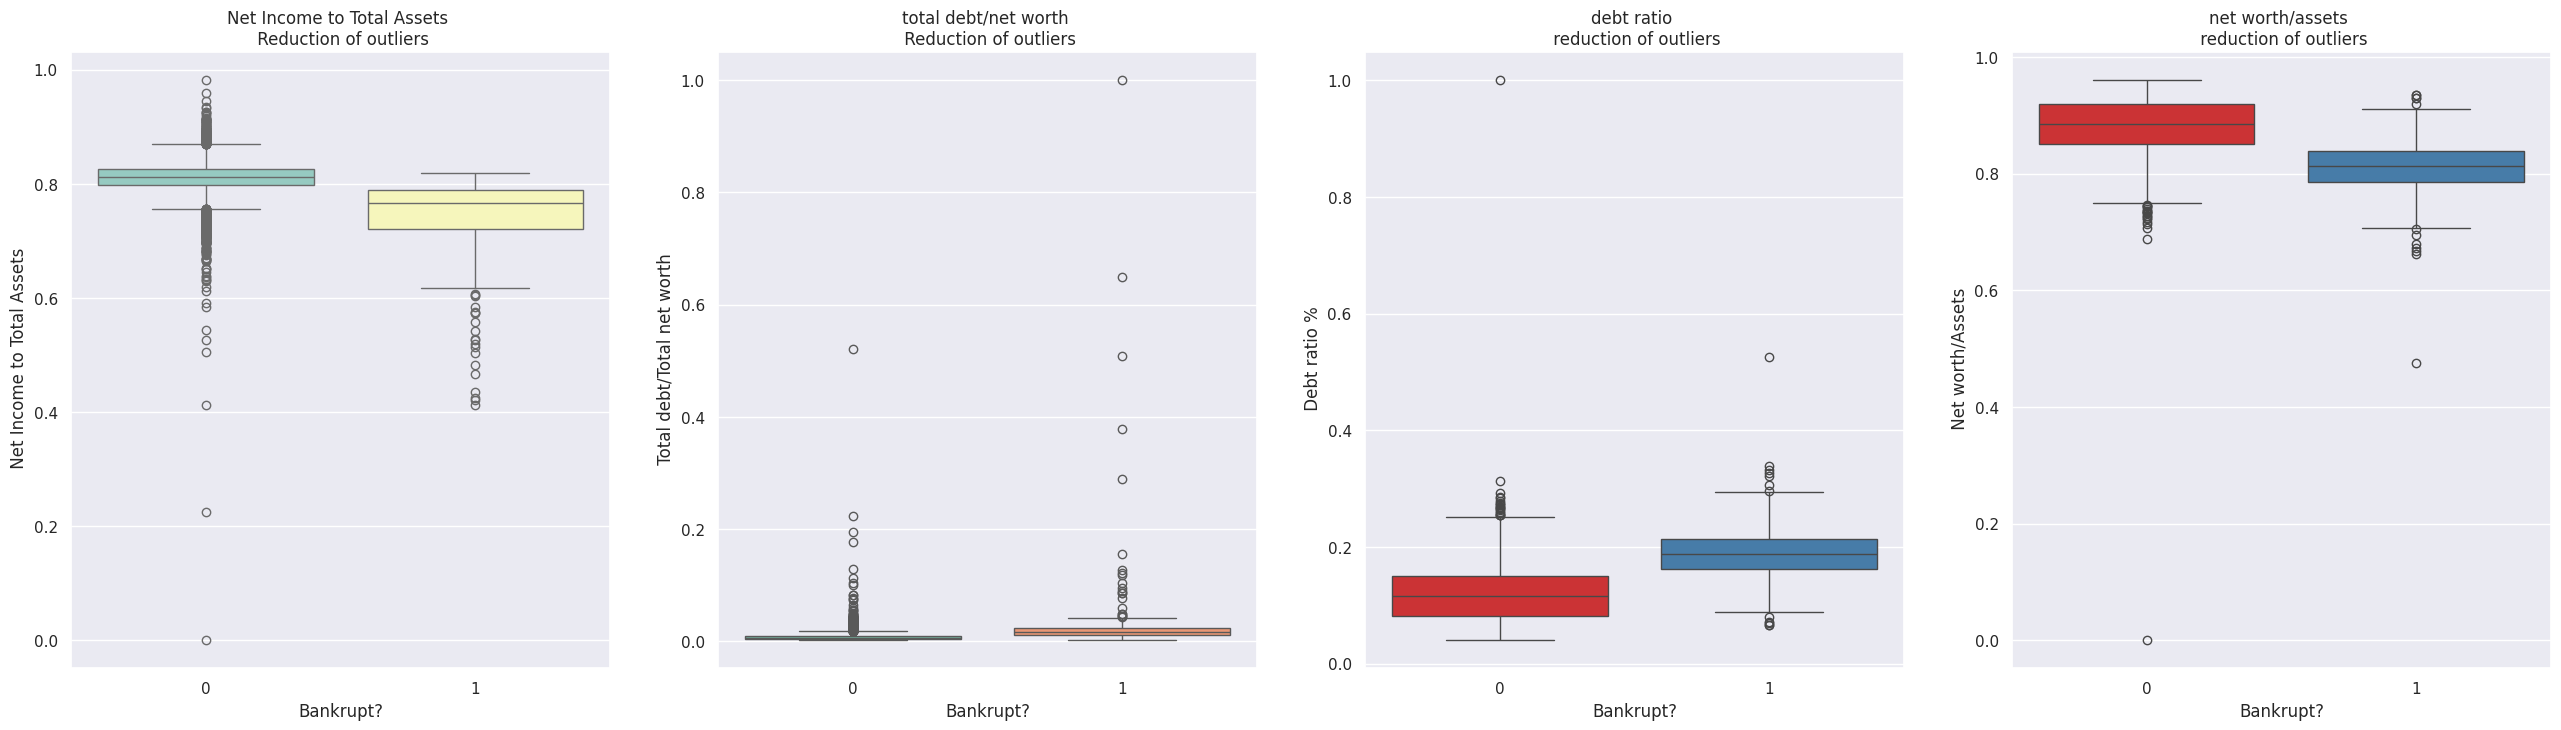

In [20]:
f, axes = plt.subplots(ncols=4, figsize=(32,8))
sns.boxplot(x="Bankrupt?", y=" Net Income to Total Assets", data= new_data, ax=axes[0], palette="Set3")
axes[0].set_title("Net Income to Total Assets \n Reduction of outliers")

sns.boxplot(x="Bankrupt?", y=" Total debt/Total net worth", data= new_data, ax=axes[1], palette="Set2")
axes[1].set_title("total debt/net worth \n Reduction of outliers")

sns.boxplot(x="Bankrupt?",y=" Debt ratio %", data=new_data, ax=axes[2], palette="Set1")
axes[2].set_title("debt ratio \n reduction of outliers")

sns.boxplot(x="Bankrupt?",y=" Net worth/Assets", data=new_data, ax=axes[3], palette="Set1")
axes[3].set_title("net worth/assets \n reduction of outliers")
plt.show()

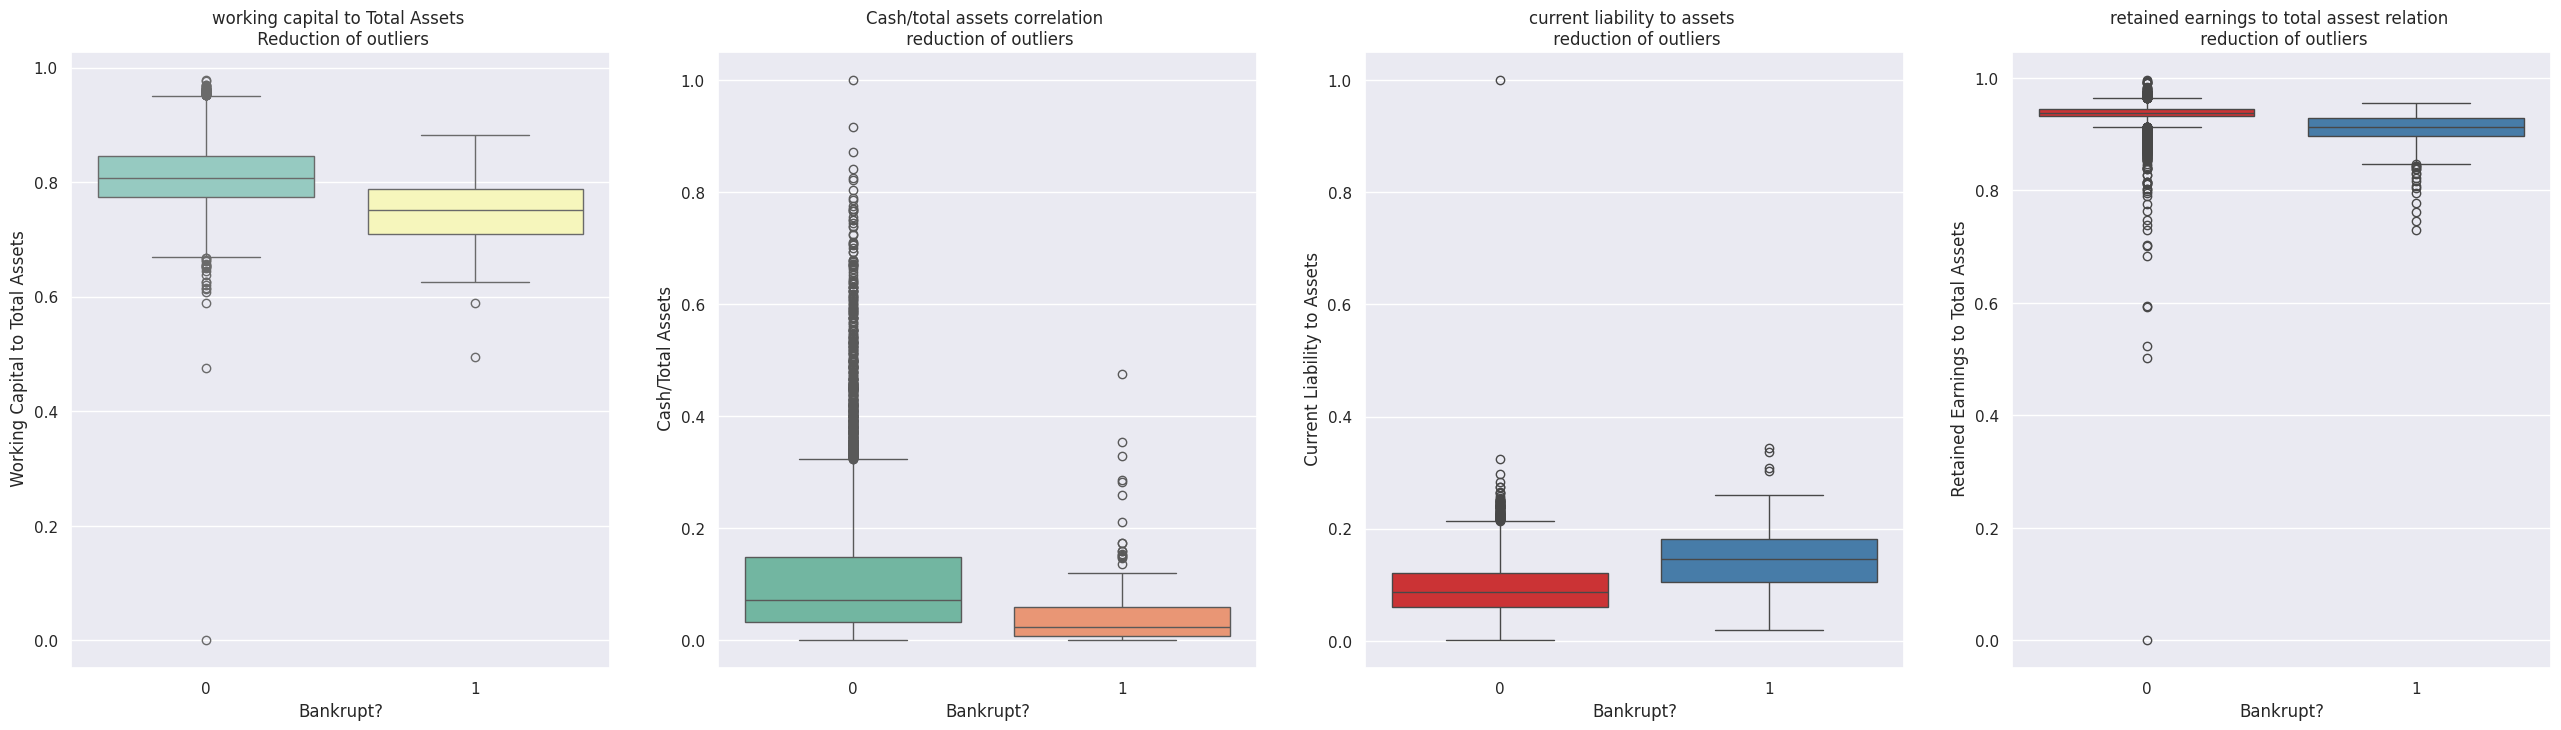

In [21]:
f, axes = plt.subplots(ncols=4, figsize=(32,8))
sns.boxplot(x="Bankrupt?", y=" Working Capital to Total Assets", data= new_data, ax=axes[0], palette="Set3")
axes[0].set_title("working capital to Total Assets \n Reduction of outliers")

sns.boxplot(x="Bankrupt?", y=" Cash/Total Assets", data= new_data, ax=axes[1], palette="Set2")
axes[1].set_title("Cash/total assets correlation \n reduction of outliers")

sns.boxplot(x="Bankrupt?",y=" Current Liability to Assets", data=new_data, ax=axes[2], palette="Set1")
axes[2].set_title("current liability to assets \n reduction of outliers")

sns.boxplot(x="Bankrupt?",y=" Retained Earnings to Total Assets", data=new_data, ax=axes[3], palette="Set1")
axes[3].set_title("retained earnings to total assest relation \n reduction of outliers")
plt.show()

plotting the feature distribution for close to bankruptcy conpanies

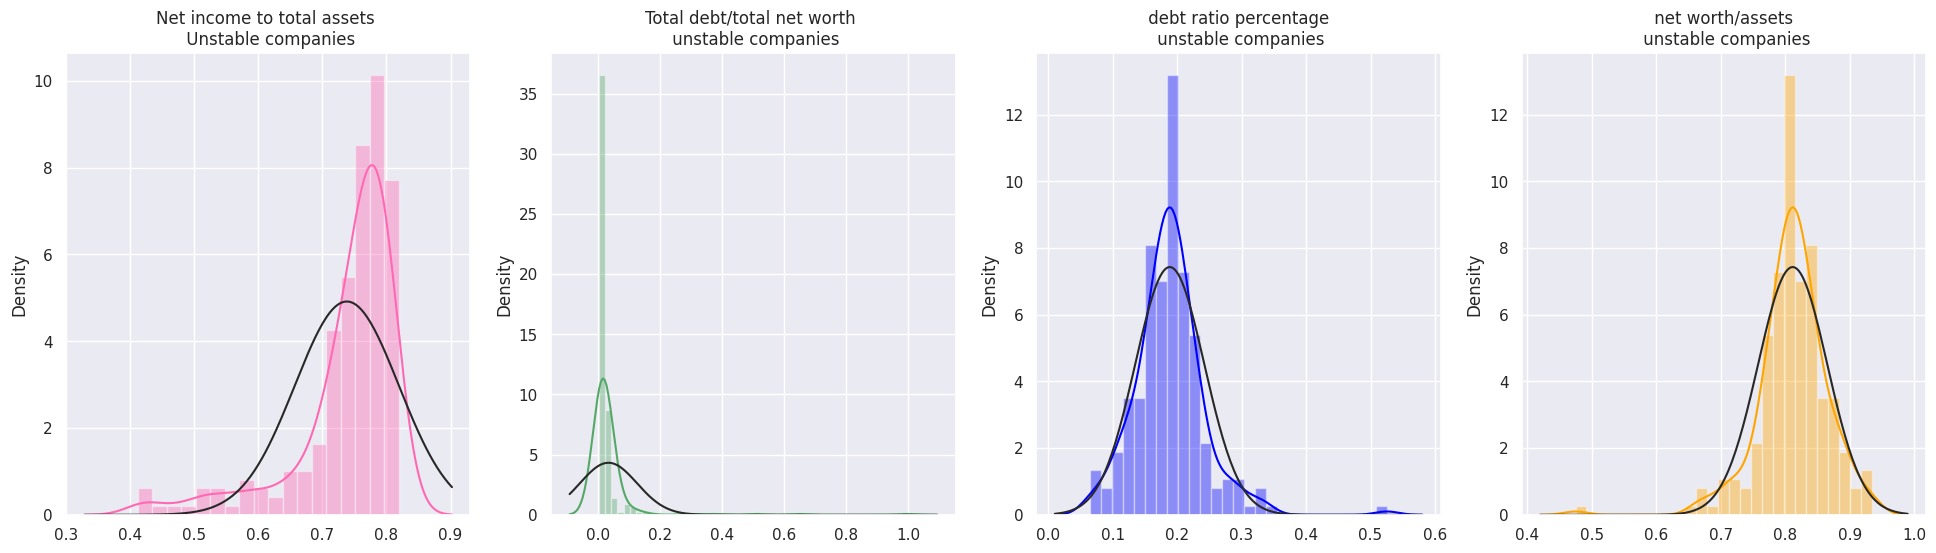

In [22]:
plt.figure(figsize=(24,6))

plt.subplot(1,4,1)
sns.distplot((new_data[' Net Income to Total Assets'].loc[new_data['Bankrupt?']==1].values),color='Hotpink',fit=norm)
plt.title("Net income to total assets \n Unstable companies")

plt.subplot(1,4,2)
sns.distplot((new_data[' Total debt/Total net worth'].loc[new_data["Bankrupt?"]==1].values),color="g",fit=norm)
plt.title("Total debt/total net worth \n unstable companies")

plt.subplot(1,4,3)
sns.distplot((new_data[' Debt ratio %'].loc[new_data["Bankrupt?"]==1].values),color="blue",fit=norm)
plt.title(" debt ratio percentage \n unstable companies")

plt.subplot(1,4,4)
sns.distplot((new_data[' Net worth/Assets'].loc[new_data["Bankrupt?"]==1].values),color="orange",fit=norm)
plt.title(" net worth/assets \n unstable companies")
plt.show()

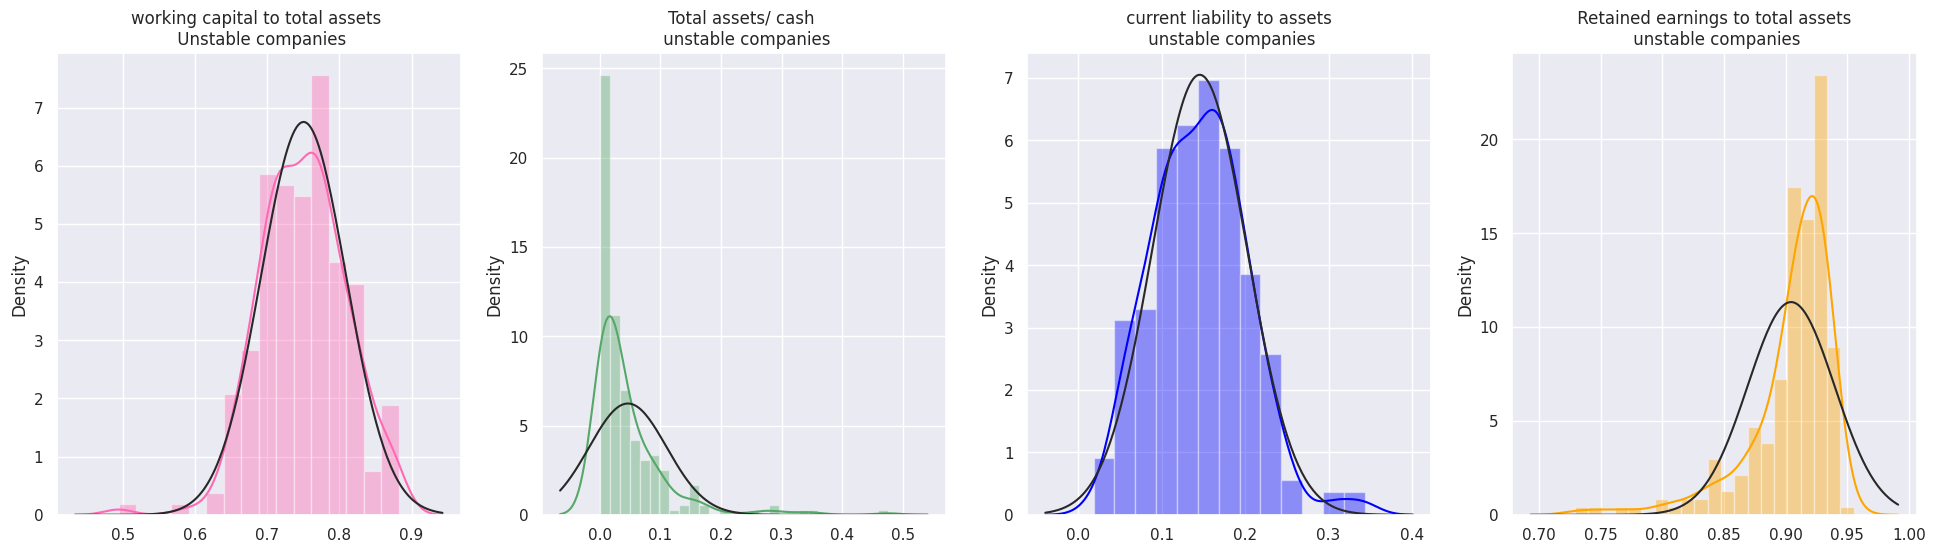

In [23]:
plt.figure(figsize=(24,6))

plt.subplot(1,4,1)
sns.distplot((new_data[' Working Capital to Total Assets'].loc[new_data['Bankrupt?']==1].values),color='Hotpink',fit=norm)
plt.title("working capital to total assets \n Unstable companies")

plt.subplot(1,4,2)
sns.distplot((new_data[' Cash/Total Assets'].loc[new_data["Bankrupt?"]==1].values),color="g",fit=norm)
plt.title("Total assets/ cash \n unstable companies")

plt.subplot(1,4,3)
sns.distplot((new_data[' Current Liability to Assets'].loc[new_data["Bankrupt?"]==1].values),color="blue",fit=norm)
plt.title(" current liability to assets \n unstable companies")

plt.subplot(1,4,4)
sns.distplot((new_data[' Retained Earnings to Total Assets'].loc[new_data["Bankrupt?"]==1].values),color="orange",fit=norm)
plt.title(" Retained earnings to total assets \n unstable companies")
plt.show()

we removing the extreme outliers definitely helps to obtain more bell curve shape distribution.

# Split the data and labels

In [24]:
labels = new_data['Bankrupt?']
new_data1 =new_data.drop(['Bankrupt?'], axis=1)

### Now we tranform our new datafream by using the log trasform its reduce the errors and helps for better prediction.

In [25]:
def log_trans(data):
  for col in data:
    skew = data[col].skew()
    if skew >0.5 or skew < -0.5:
      data[col] = np.log1p(data[col])
    else:
      continue
  return data

data_norm = log_trans(new_data1)

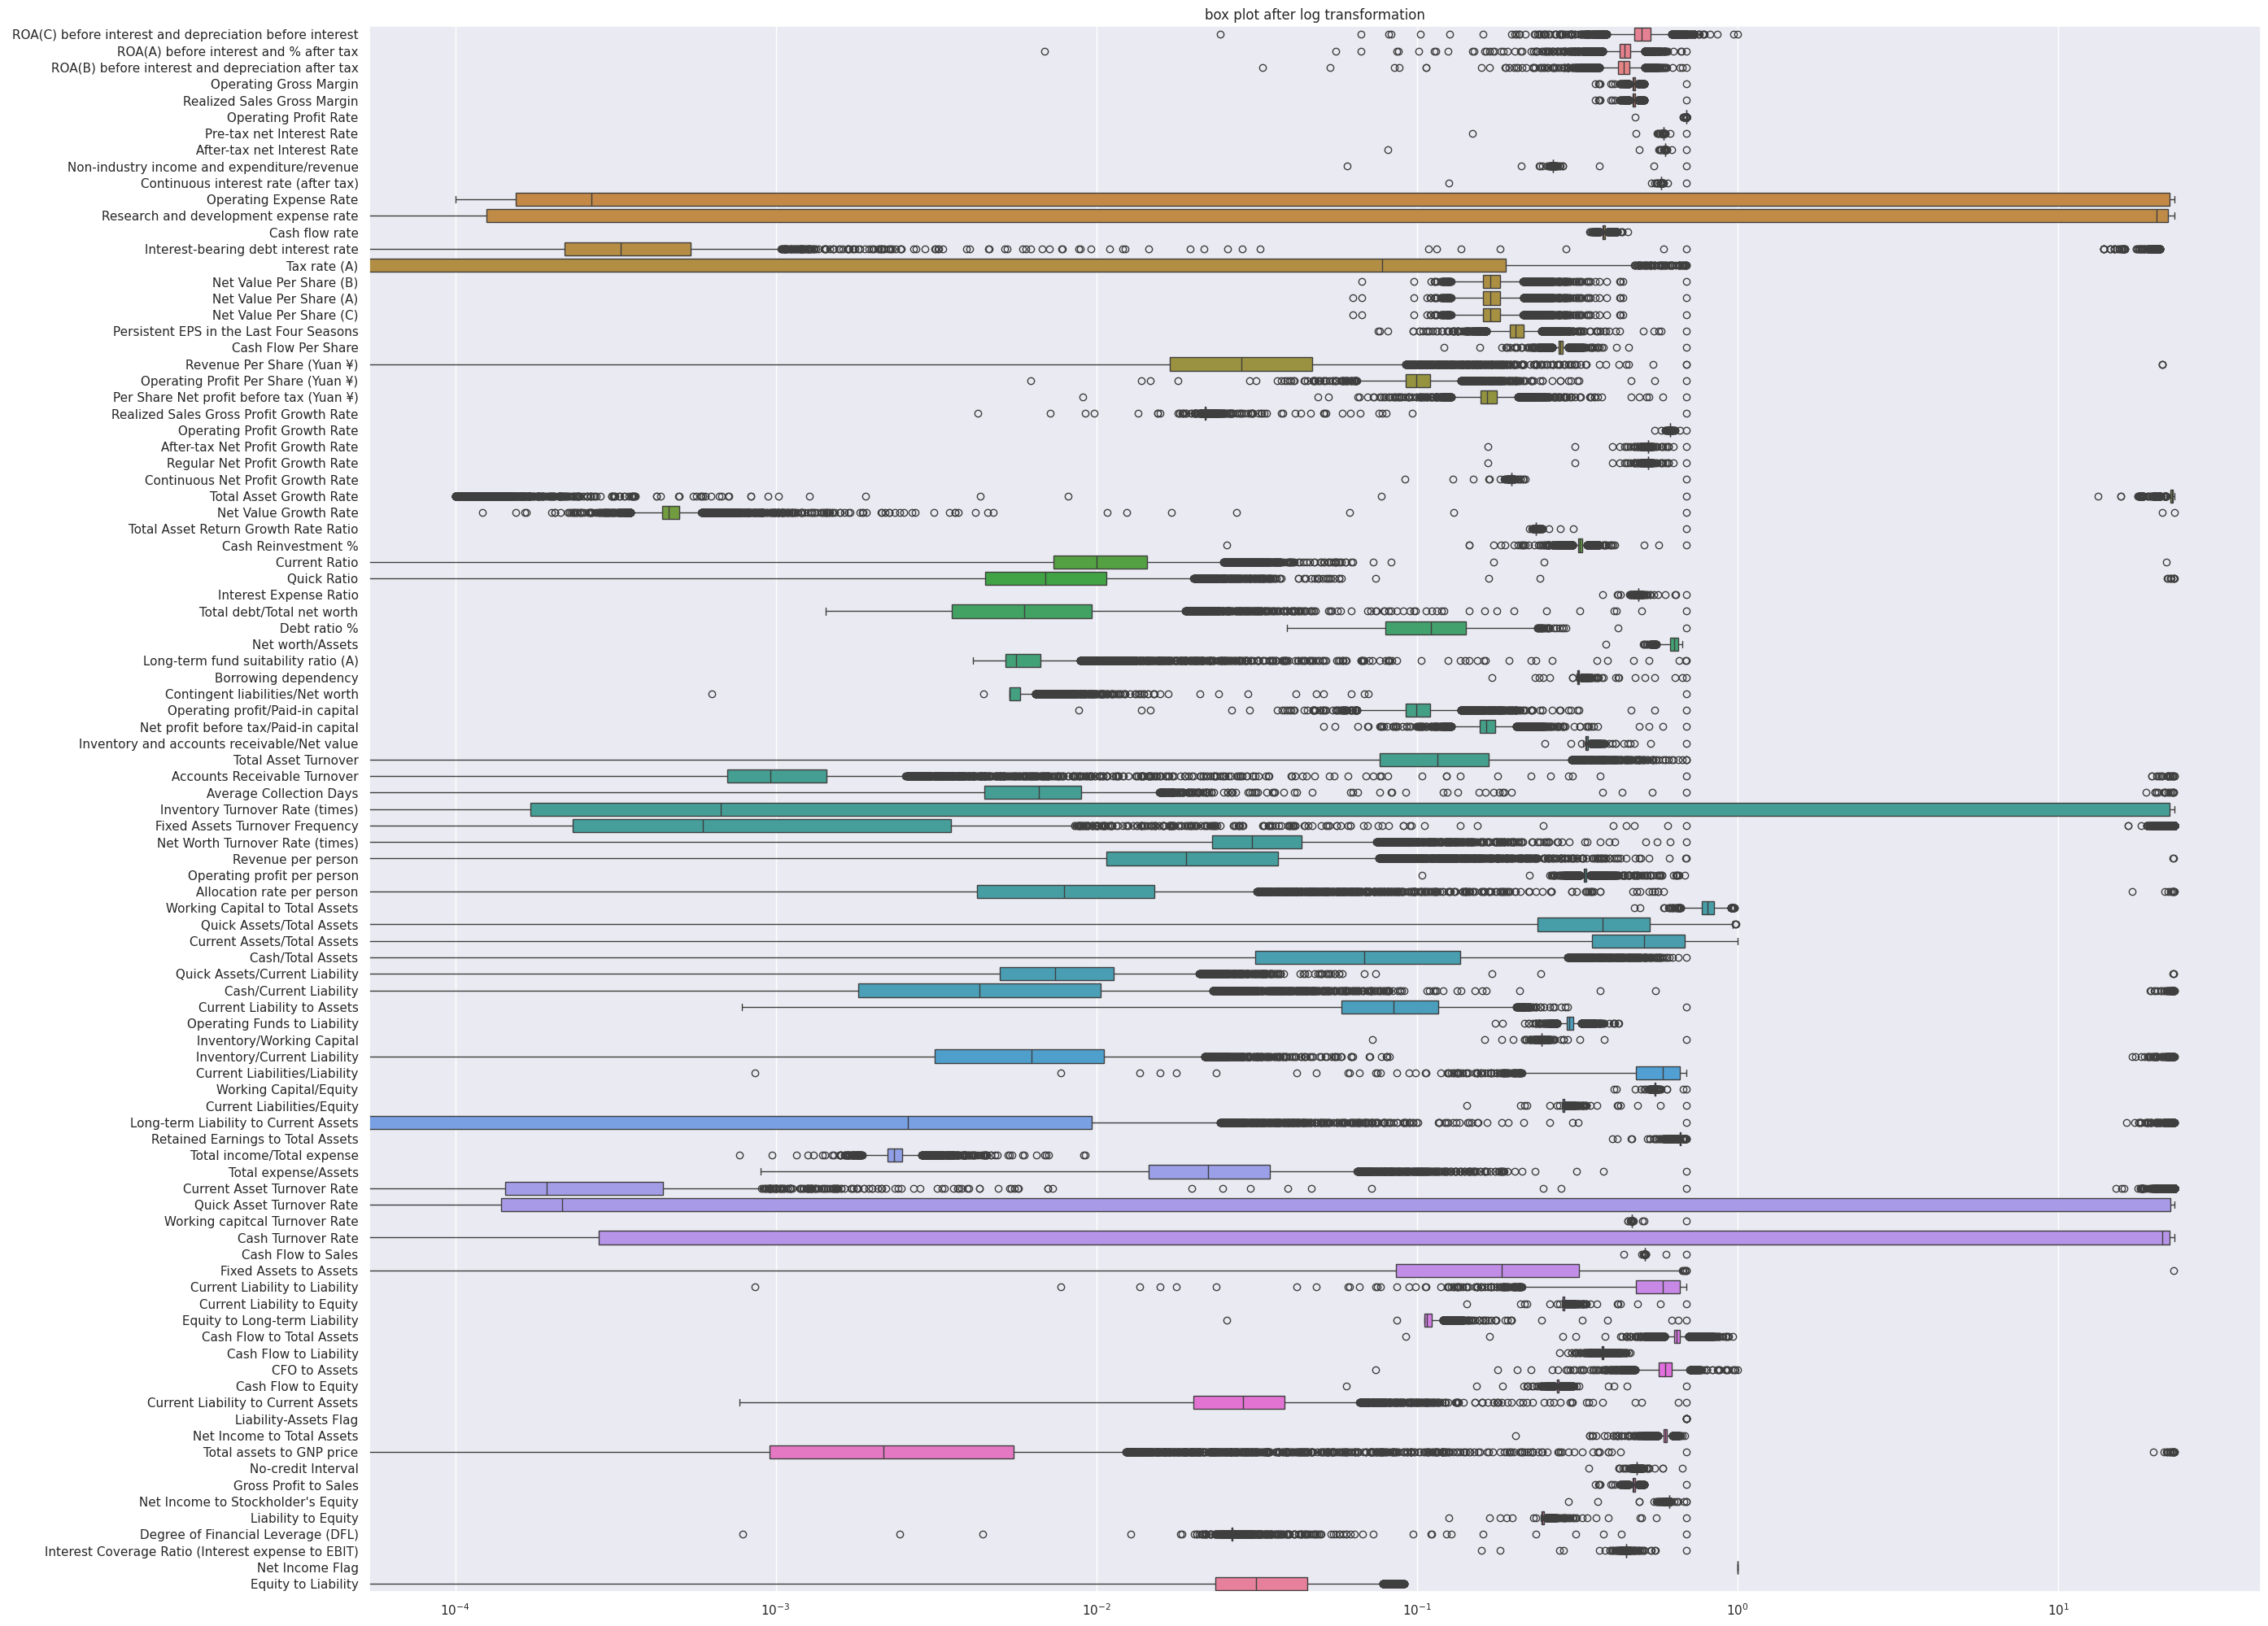

In [26]:
# plotting Boxplot with new data
plt.figure(figsize=(30,25))
ax = sns.boxplot(data=data_norm, orient ="h")
ax.set_title("box plot after log transformation")
ax.set(xscale="log")
plt.show()

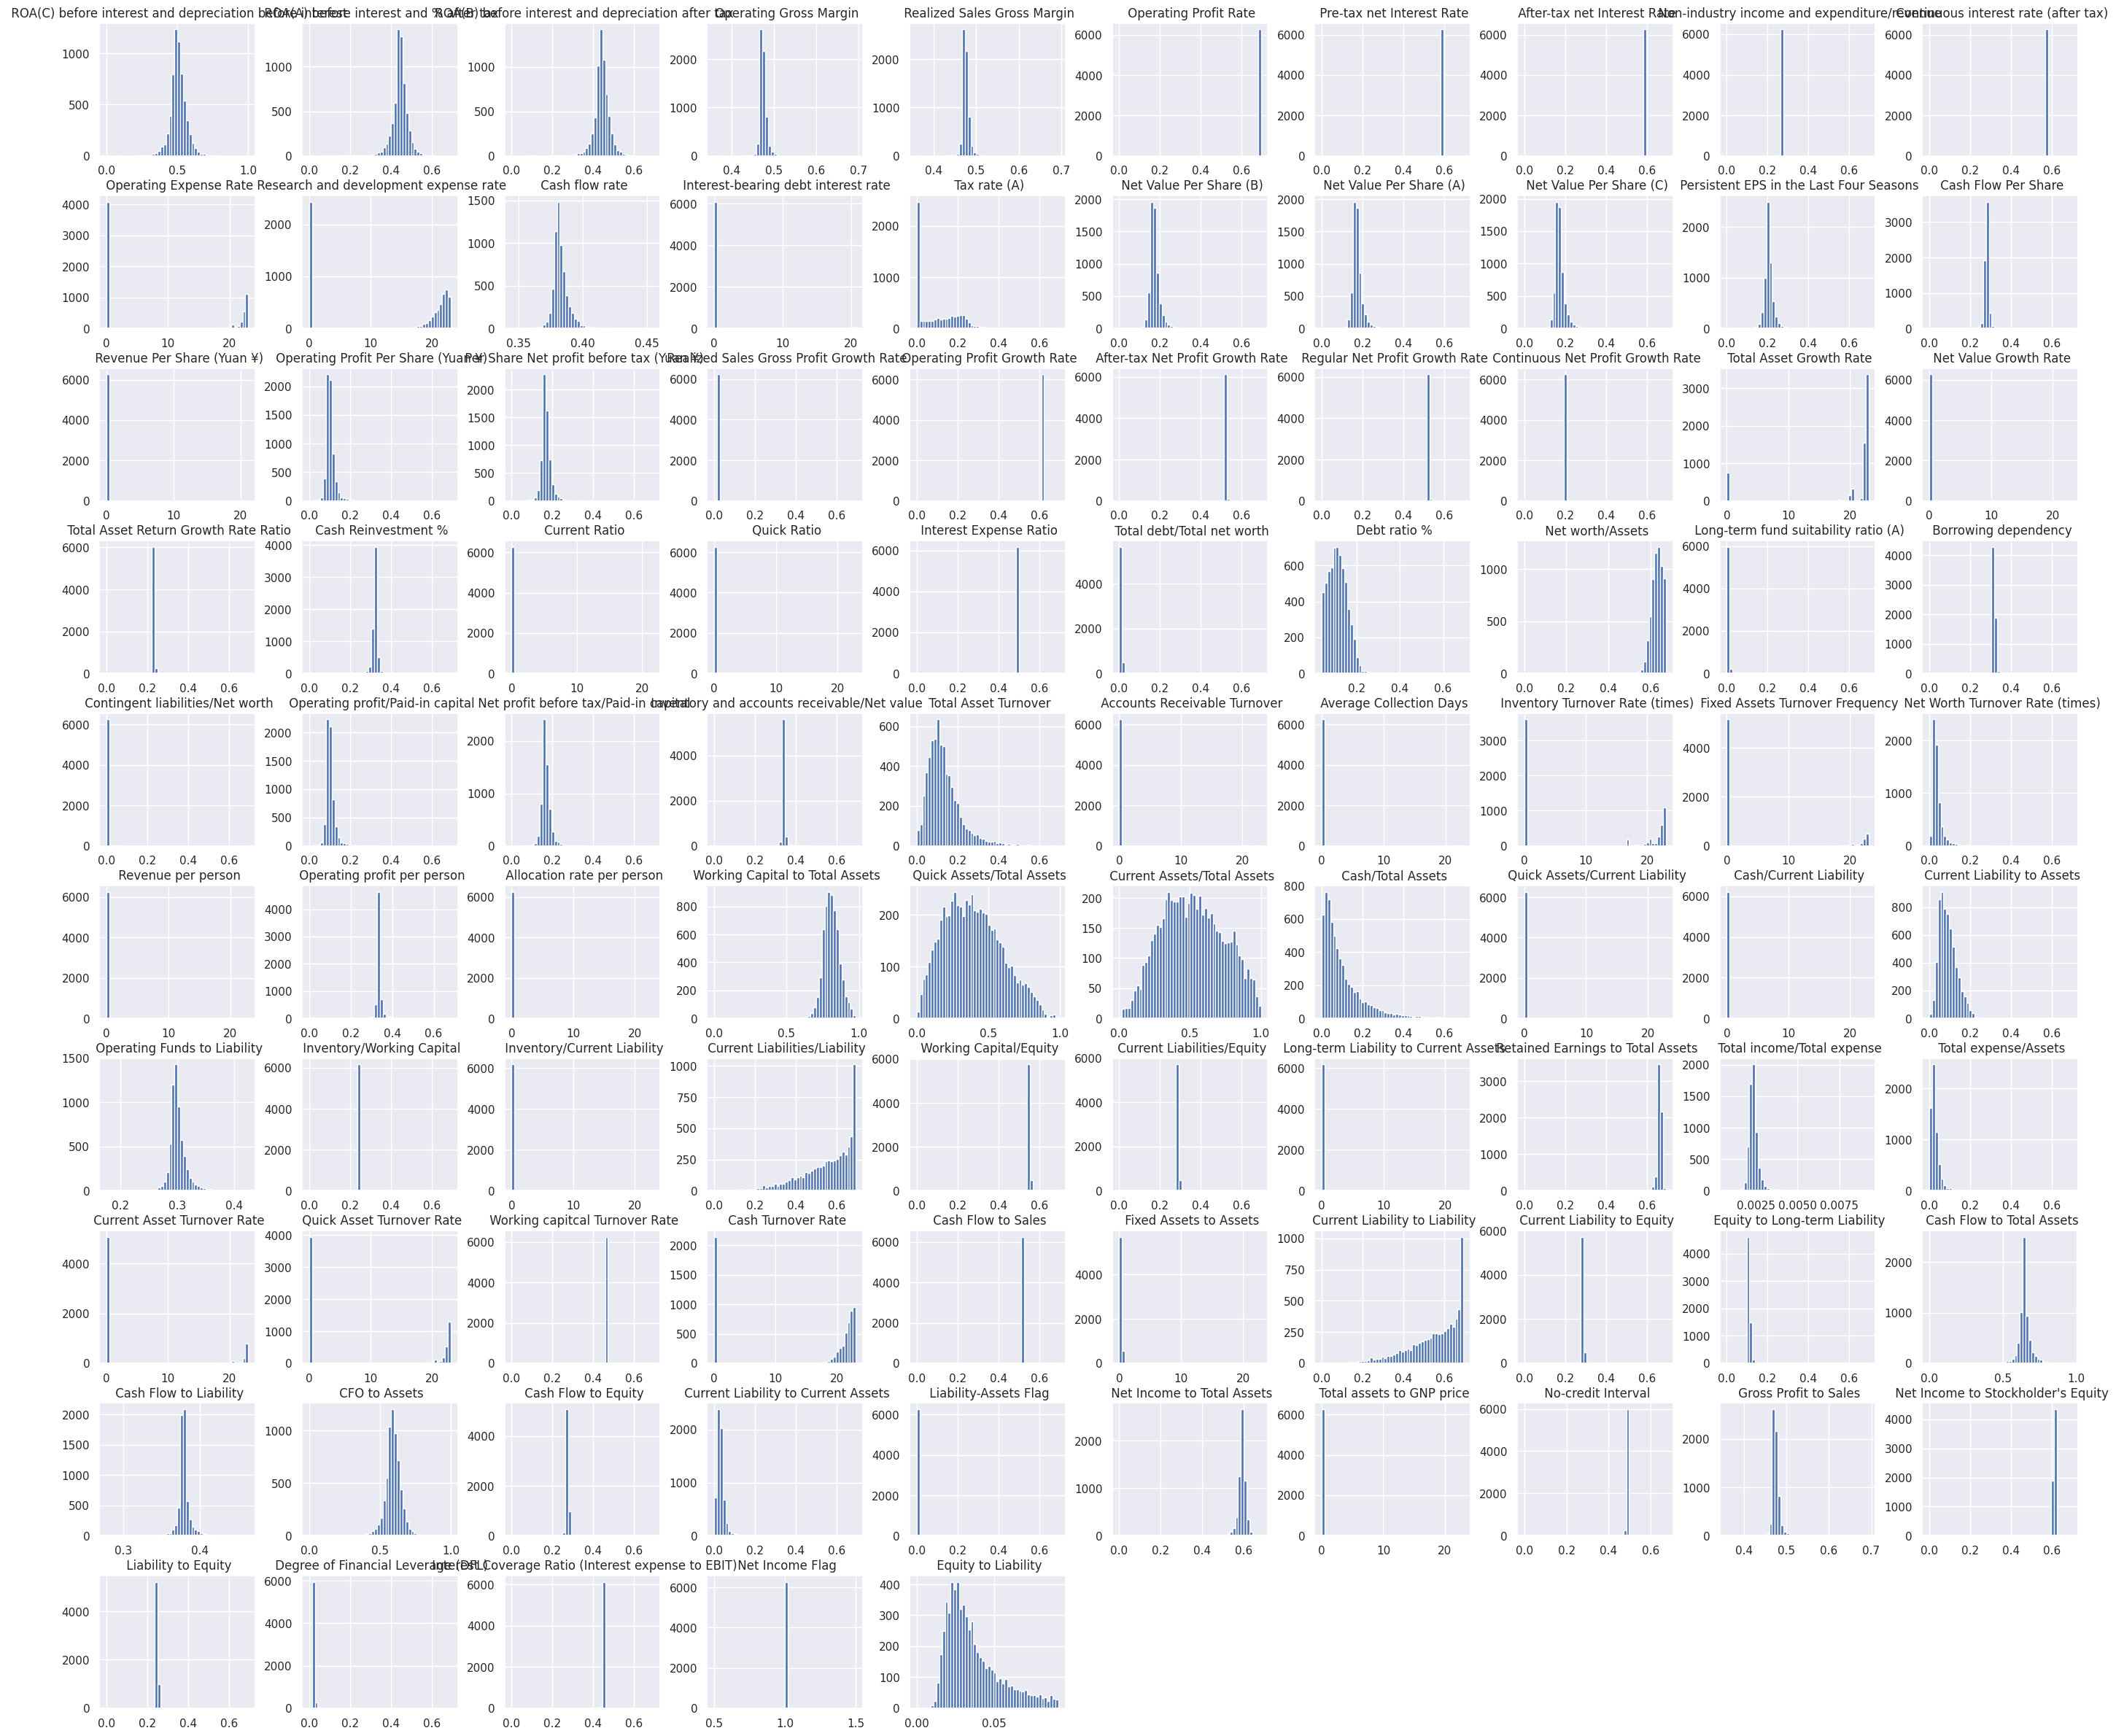

In [27]:
# looking the hist plot with new data
data_norm.hist(bins=50, figsize=(35,30))
plt.show()

# Split the data into Train And Test

In [28]:
x_train,x_test,y_train,y_test = train_test_split(data_norm,labels,test_size=0.1,stratify=labels,random_state=42)

In [29]:
# looking the shape of x_train and x_test
x_train.shape, x_test.shape

((5643, 95), (627, 95))

In [30]:
# looking the shape of y_train and y_test
y_train.shape, y_test.shape

((5643,), (627,))

#  Our dataset is Imbalanced data so its important to impute it by using SMOTE as oversampling technique it can help us to improve the performance

##SMOTE (Synthetic Minority Over-sampling Technique) is a popular method used to address the class imbalance problem in machine learning. It works by generating synthetic samples for the minority class to balance the class distribution

#In this dataset we using the Stratified cross validation splitting because we want to check our prediction with unknowing data values

#Stratified K-Fold Cross-Validation:
### It ensures that each fold has a representative proportion of each class. This is particularly useful for imbalanced datasets.

In [31]:
#  Stratified Cross Validation
sss = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)
for train_index, test_index in sss.split(x_train, y_train):
  print('Train :', train_index, 'Test :', test_index)
  x_train_sm, x_test_sm = x_train.iloc[train_index], x_train.iloc[test_index]
  y_train_sm, y_test_sm = y_train.iloc[train_index], y_train.iloc[test_index]

Train : [   0    1    2 ... 5639 5640 5641] Test : [   3    5   13 ... 5630 5636 5642]
Train : [   1    2    3 ... 5640 5641 5642] Test : [   0   10   11 ... 5614 5623 5629]
Train : [   0    1    2 ... 5640 5641 5642] Test : [   7    9   15 ... 5631 5632 5637]
Train : [   0    1    3 ... 5640 5641 5642] Test : [   2    4   16 ... 5621 5633 5638]
Train : [   0    2    3 ... 5637 5638 5642] Test : [   1    6    8 ... 5639 5640 5641]


In [32]:
# checking the distribution of the labels
# turn into an array
x_train_sm = x_train_sm.values
x_test_sm = x_test_sm.values
y_train_sm = y_train_sm.values
y_test_sm= y_test_sm.values

In [33]:
print(x_train_sm.shape)
print(x_test_sm.shape)
print(y_train_sm.shape)
print(y_train_sm.shape)

(4515, 95)
(1128, 95)
(4515,)
(4515,)


### Lets see if both the train and test label class distribution are similarty distributed.

In [34]:
train_unique_label, train_counts_label = np.unique(y_train_sm, return_counts= True)
test_unique_label, test_counts_label = np.unique(y_test_sm, return_counts= True)

In [35]:
print(train_unique_label, train_counts_label, "\n", train_counts_label/len(y_train_sm))


print(test_unique_label, train_counts_label, "\n", test_counts_label/len(y_test_sm))

[0 1] [4358  157] 
 [0.96522702 0.03477298]
[0 1] [4358  157] 
 [0.96542553 0.03457447]


# Here now we can use SMOTE technique during the cross validation not before..

# We also use here the pipeline by imblearn.pipline for imbalanced dataset

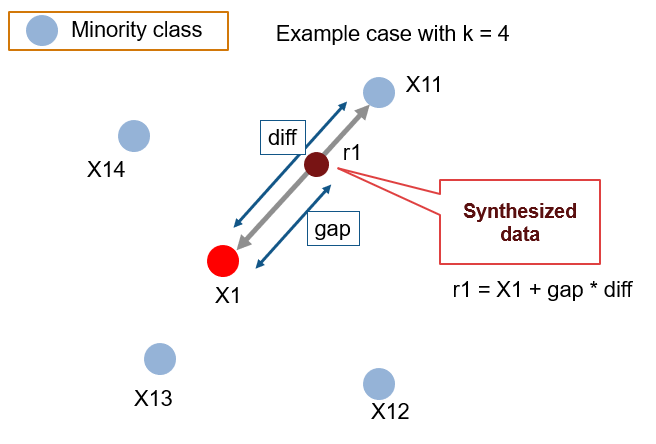

In [36]:
 from IPython.display import Image
Image(filename='/content/77417image1.png')

# Model Building
Now, let's see what we can do with our models! We will see the performances on the cleaned undersampled data and on the SMOTE oversampled data. For this part I decided to use a few different models:

* Logistic Regression
* XGBClassifier
* Random Forest Classifier



In [37]:
# list to append the score and then find the average
accuracy_lst_reg = []
precision_lst_reg = []
recall_lst_reg = []
f1_lst_reg = []
auc_lst_reg = []

In [38]:
from imblearn.pipeline import make_pipeline

log_reg_sm = LogisticRegression()

#log_reg_params = {}
# penalty: Type of regularization (here, L2).
# C: Inverse of regularization strength (smaller values mean stronger regularization).
# class_weight: How to address class imbalance ('balanced' adjusts weights inversely proportional to class frequencies).
# solver: Algorithm to use for optimization.

log_reg_params = {"penalty": ['l2'],
                  'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                  'class_weight': ['balanced',None],
                  'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}
rand_log_reg = RandomizedSearchCV(LogisticRegression(), log_reg_params, n_iter=4) # It takes the base LogisticRegression model.
                                                                                  # It uses the log_reg_params grid for hyperparameter values.
                                                                                  # n_iter=4 means it will randomly sample and try 4 different combinations of hyperparameters.


for train, val in sss.split(x_train_sm, y_train_sm):
    pipeline_reg = make_pipeline(SMOTE(sampling_strategy='minority'), rand_log_reg) #Creating Pipeline: Inside the loop,
                                                                                               # a pipeline (pipeline_reg) is created using make_pipeline.
                                                                                               # This pipeline first applies SMOTE to oversample the minority class and then
                                                                                               # fits a logistic regression model with randomized search (rand_log_reg).
    model_reg = pipeline_reg.fit(x_train_sm[train], y_train_sm[train])
    best_est_reg = rand_log_reg.best_estimator_  # best estimator found during the randomized search extracted.
    prediction_reg = best_est_reg.predict(x_train_sm[val])

    accuracy_lst_reg.append(pipeline_reg.score(x_train_sm[val], y_train_sm[val])) #This line calculates the accuracy of the logistic regression model
    precision_lst_reg.append(precision_score(y_train_sm[val], prediction_reg)) # Calculates the precision of the model on the validation set.
    recall_lst_reg.append(recall_score(y_train_sm[val], prediction_reg)) # calculate recall of the model
    f1_lst_reg.append(f1_score(y_train_sm[val], prediction_reg)) # calculate f1_score
    auc_lst_reg.append(roc_auc_score(y_train_sm[val], prediction_reg))


print('Logistic Regression (SMOTE) results:')
print('')
print("accuracy: {}".format(np.mean(accuracy_lst_reg)))
print("precision: {}".format(np.mean(precision_lst_reg)))
print("recall: {}".format(np.mean(recall_lst_reg)))
print("f1: {}".format(np.mean(f1_lst_reg)))

Logistic Regression (SMOTE) results:

accuracy: 0.8434108527131784
precision: 0.15375420015915212
recall: 0.770766129032258
f1: 0.25610467050972086


### Here we got 86% of acuuracy score rate from the using of logistic regression model lets check precision and recall, F1 score

In [39]:
# Printing the classification report

label = ['Financial.Stable', 'Financial.Unstable']
pred_reg_sm = best_est_reg.predict(x_test_sm)
print(classification_report(y_test_sm, pred_reg_sm, target_names=label))

                    precision    recall  f1-score   support

  Financial.Stable       0.99      0.84      0.91      1089
Financial.Unstable       0.15      0.77      0.24        39

          accuracy                           0.84      1128
         macro avg       0.57      0.80      0.58      1128
      weighted avg       0.96      0.84      0.89      1128



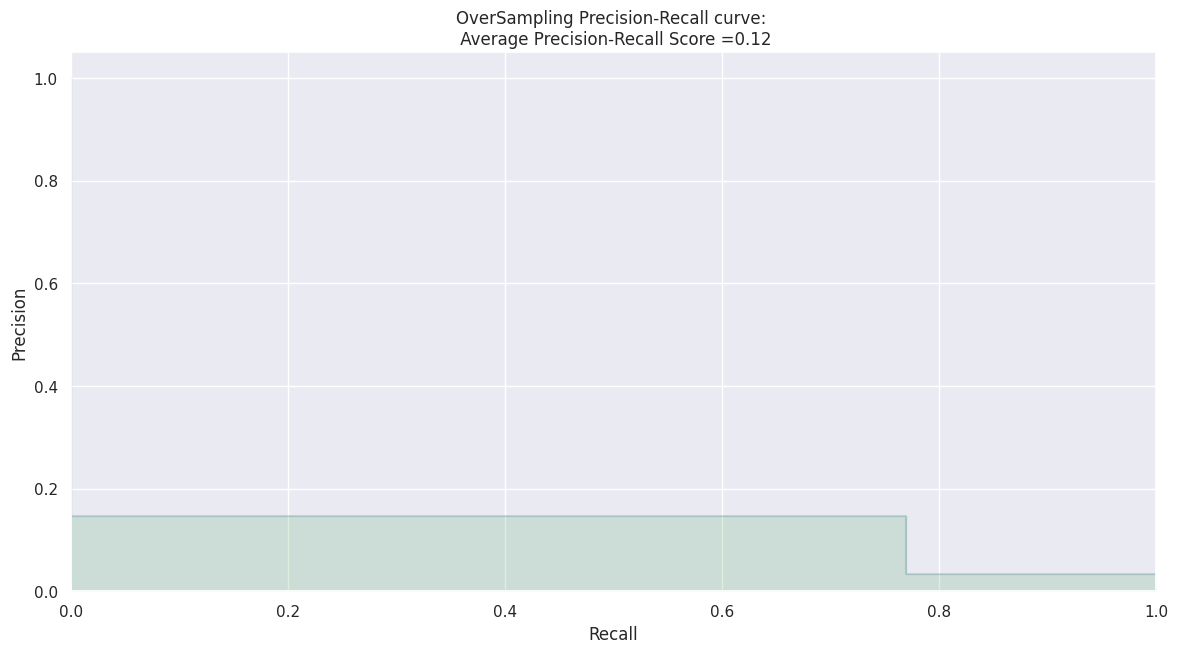

In [40]:
# Import the necessary function
from sklearn.metrics import average_precision_score, precision_recall_curve

# Plotting Precision-Recall curve

y_score_reg = best_est_reg.predict(x_test_sm) # predicting the best estimator on the test set
average_precision = average_precision_score(y_test_sm, y_score_reg) # Now you can use average_precision_score
fig = plt.figure(figsize=(14,7))
precision, recall, _ = precision_recall_curve(y_test_sm, y_score_reg)
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')                                   # calculate precision-recall curve and ploting
plt.fill_between(recall, precision, step='post', alpha=0.2, color='g')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('OverSampling Precision-Recall curve: \n Average Precision-Recall Score ={0:0.2f}'.format(
          average_precision))

plt.show()

# Random Forest Classifier

In [41]:
# list to append the score and then find the average
accuracy_lst_rfc = []
precision_lst_rfc = []
recall_lst_rfc = []
f1_lst_rfc = []
auc_lst_rfc = []

rfc_sm = RandomForestClassifier()
# here we put the parameters for randomforestclassifier
rfc_params ={'max_features' : ['auto','sqrt','log2'],
             'random_state': [42],
             'class_weight' : ['balanced','balanced_subsample'],
             'criterion' : ['gini','entropy'],
             'bootstrap' : [True,False]}

rand_rfc = RandomizedSearchCV(rfc_sm,rfc_params, n_iter=4)

This code defines a Random Forest Classifier model with the name rfc_sm and specifies a set of hyperparameters to tune.

###hyperparameter:

max_features: Determines the number of features to consider when looking for the best split. Possible values are:
'auto': Considers all features.
'sqrt': Considers the square root of the number of features.
'log2': Considers the logarithm (base 2) of the number of features.
random_state: Sets the random seed for reproducibility. Using 42 ensures that the results can be replicated.
class_weight: Addresses class imbalance by assigning weights to classes. Options include:
'balanced': Adjusts weights inversely proportional to class frequencies.
'balanced_subsample': Similar to 'balanced' but computes weights for each bootstrap sample.
criterion: Specifies the function to measure the quality of a split. Choices are:
'gini': Uses the Gini impurity.
'entropy': Uses information gain.
bootstrap: Indicates whether bootstrap samples are used when building trees.
True: Uses bootstrapping.
False: Does not use bootstrapping.

In [42]:
for train, val in sss.split(x_train_sm, y_train_sm):
    pipeline_rfc = make_pipeline(SMOTE(sampling_strategy='minority'), rand_rfc) #Creating Pipeline: Inside the loop,
                                                                                               # a pipeline (pipeline_rfc) is created using make_pipeline.
                                                                                               # This pipeline first applies SMOTE to oversample the minority class and then
                                                                                               # fits a random forest model with randomized search (rand_log).
    model_rfc = pipeline_rfc.fit(x_train_sm, y_train_sm)
    best_est_rfc = rand_rfc.best_estimator_
    prediction_rfc = best_est_rfc.predict(x_train_sm[val])

    accuracy_lst_rfc.append(pipeline_rfc.score(x_train_sm[val], y_train_sm[val]))
    precision_lst_rfc.append(precision_score(y_train_sm[val], prediction_rfc))
    recall_lst_rfc.append(recall_score(y_train_sm[val], prediction_rfc))
    f1_lst_rfc.append(f1_score(y_train_sm[val], prediction_rfc))
    auc_lst_rfc.append(roc_auc_score(y_train_sm[val], prediction_rfc))


print("accuracy: {}".format(np.mean(accuracy_lst_rfc)))
print("precision: {}".format(np.mean(precision_lst_rfc)))
print("recall: {}".format(np.mean(recall_lst_rfc)))
print("f1: {}".format(np.mean(f1_lst_rfc)))


accuracy: 1.0
precision: 1.0
recall: 1.0
f1: 1.0


In [43]:
sm_prediction_rfc = best_est_rfc.predict(x_test_sm)
print(classification_report(y_test_sm, sm_prediction_rfc, target_names=label))

                    precision    recall  f1-score   support

  Financial.Stable       0.98      0.98      0.98      1089
Financial.Unstable       0.38      0.33      0.36        39

          accuracy                           0.96      1128
         macro avg       0.68      0.66      0.67      1128
      weighted avg       0.96      0.96      0.96      1128



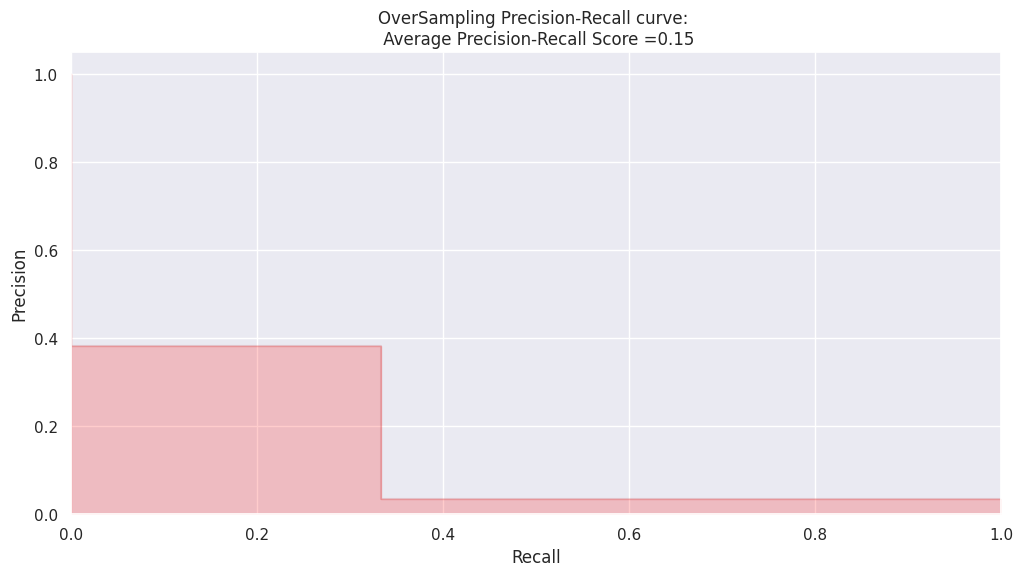

In [44]:
# Plotting Precision-Recall curve

y_score_rfc = best_est_rfc.predict(x_test_sm)
average_precision_rfc = average_precision_score(y_test_sm, y_score_rfc)
fig = plt.figure(figsize=(12,6))
precision_rfc, recall_rfc, _ = precision_recall_curve(y_test_sm, y_score_rfc)
plt.step(recall_rfc, precision_rfc, color='r', alpha=0.2,where='post')
plt.fill_between(recall_rfc, precision_rfc, step='post', alpha=0.2,
                 color='red')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('OverSampling Precision-Recall curve: \n Average Precision-Recall Score ={0:0.2f}'.format(
          average_precision_rfc))

plt.show()

### Here we got 99% of acuuracy score rate from the using of Random Forest Classifier model lets check precision and recall, F1 score

# XGBOOST

In [45]:
# List to append the score and then find the average

accuracy_lst_xgb = []
precision_lst_xgb = []
recall_lst_xgb = []
f1_lst_xgb = []
auc_lst_xgb = []

xgb_sm = xgb.XGBClassifier(random_state = 42)
xgb_params = {'eta' : [0.1,0.01,0.001],  # Learning rate
              'eval_metric': ['logloss'],
              'max_depth' : [3,6,9],
              'lambda' : [1,1.5,2],      # L2 regularization (higher values make model more conservative)
              'alpha' : [0,0.5,1]}        # L1 regularization (higher values make model more conservative)

rand_xgb = RandomizedSearchCV(xgb_sm, xgb_params, n_iter=4)


for train, val in sss.split(x_train_sm, y_train_sm):
    pipeline_xgb = make_pipeline(SMOTE(sampling_strategy='minority'), rand_xgb)
    model_xgb = pipeline_xgb.fit(x_train_sm, y_train_sm)
    best_est_xgb = rand_xgb.best_estimator_
    prediction_xgb = best_est_xgb.predict(x_train_sm[val])
    accuracy_lst_xgb.append(pipeline_xgb.score(x_train_sm[val], y_train_sm[val]))
    precision_lst_xgb.append(precision_score(y_train_sm[val], prediction_xgb))
    recall_lst_xgb.append(recall_score(y_train_sm[val], prediction_xgb))
    f1_lst_xgb.append(f1_score(y_train_sm[val], prediction_xgb))
    auc_lst_xgb.append(roc_auc_score(y_train_sm[val], prediction_xgb))

print("accuracy: {}".format(np.mean(accuracy_lst_xgb)))
print("precision: {}".format(np.mean(precision_lst_xgb)))
print("recall: {}".format(np.mean(recall_lst_xgb)))
print("f1: {}".format(np.mean(f1_lst_xgb)))

accuracy: 0.9856035437430786
precision: 0.7918734866828088
recall: 0.9616935483870968
f1: 0.8528314597280116


In [46]:
# Printing classification report

sm_prediction_xgb = best_est_xgb.predict(x_test_sm)
print(classification_report(y_test_sm, sm_prediction_xgb, target_names=label))

                    precision    recall  f1-score   support

  Financial.Stable       0.98      0.95      0.96      1089
Financial.Unstable       0.27      0.56      0.37        39

          accuracy                           0.93      1128
         macro avg       0.63      0.75      0.67      1128
      weighted avg       0.96      0.93      0.94      1128



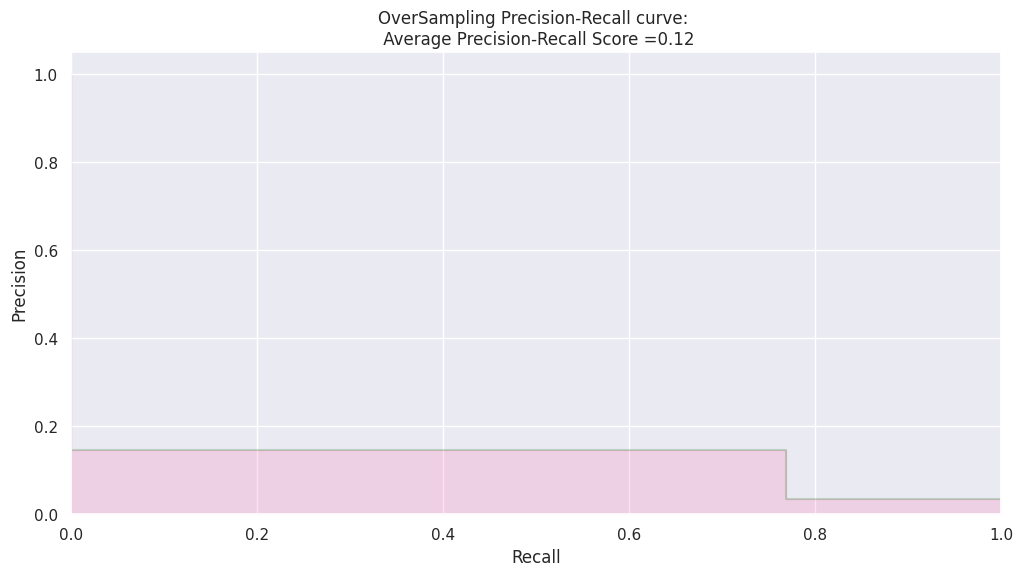

In [47]:
# Plotting Precision-Recall curve
from sklearn.metrics import average_precision_score, precision_recall_curve

y_score_reg = best_est_reg.predict(x_test_sm)
average_precision = average_precision_score(y_test_sm, y_score_reg)
fig = plt.figure(figsize=(12,6))
precision, recall, _ = precision_recall_curve(y_test_sm, y_score_reg)
plt.step(recall, precision, color='green', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='hotpink')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('OverSampling Precision-Recall curve: \n Average Precision-Recall Score ={0:0.2f}'.format(
          average_precision))

plt.show()

### Here we got 98% of acuuracy score rate from the using of XGBOOST Classifier model lets check precision and recall, F1 score

# looking the Resutls

A ROC curve is a graph showing how well a classification model distinguishes between classes at different thresholds. It plots the true positive rate against the false positive rate, helping visualize the trade-off between correctly identifying positives and minimizing false alarms.

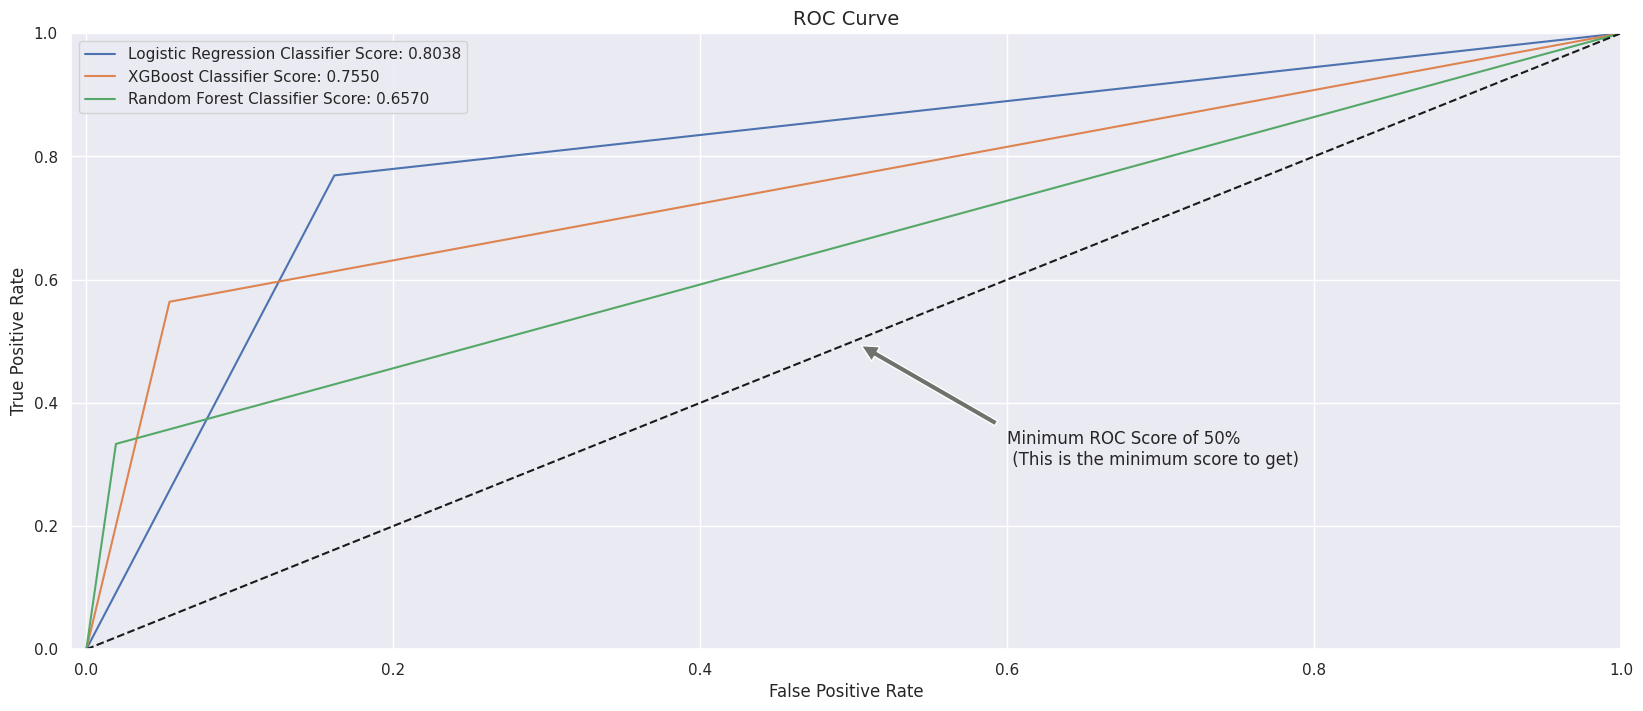

In [48]:
from sklearn.metrics import roc_curve

log_fpr, log_tpr, log_thresold = roc_curve(y_test_sm, pred_reg_sm)
rfc_fpr, rfc_tpr, rfc_threshold = roc_curve(y_test_sm, sm_prediction_rfc)
xgb_fpr, xgb_tpr, xgb_thresold = roc_curve(y_test_sm, sm_prediction_xgb)


def graph_roc_curve_multiple(log_fpr, log_tpr, rfc_fpr, rfc_tpr,xgb_fpr, xgb_tpr):
    plt.figure(figsize=(20,8))
    plt.title('ROC Curve', fontsize=14)
    plt.plot(log_fpr, log_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_test_sm, pred_reg_sm)))
    plt.plot(xgb_fpr, xgb_tpr, label='XGBoost Classifier Score: {:.4f}'.format(roc_auc_score(y_test_sm, sm_prediction_xgb)))
    plt.plot(rfc_fpr, rfc_tpr, label='Random Forest Classifier Score: {:.4f}'.format(roc_auc_score(y_test_sm, sm_prediction_rfc)))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
    plt.legend()

graph_roc_curve_multiple(log_fpr, log_tpr, rfc_fpr, rfc_tpr,xgb_fpr, xgb_tpr)
plt.show()

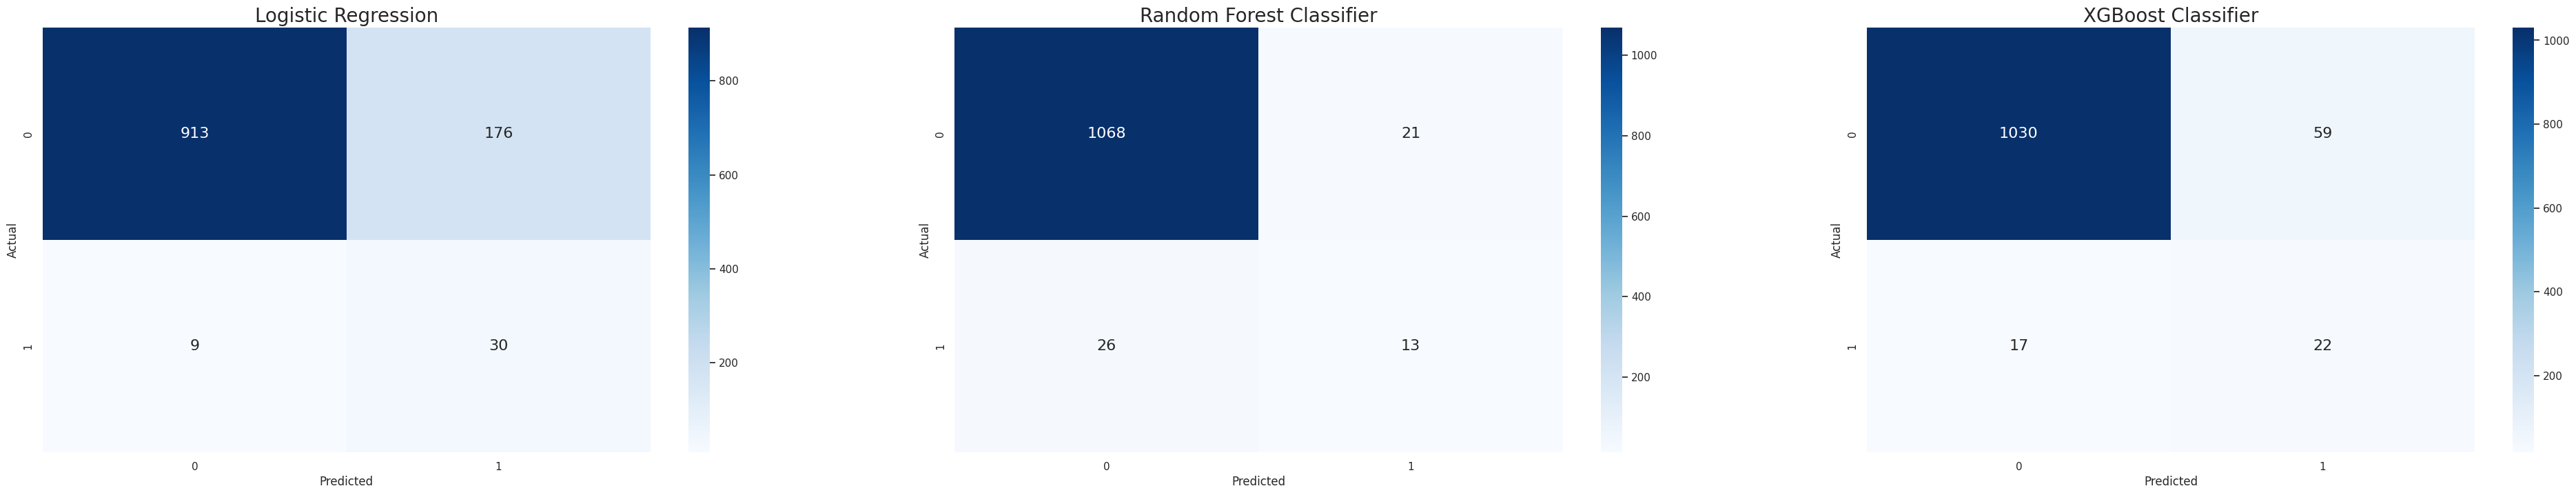

In [49]:
# Plotting confusion matrix for each classifier

conf_mx0 = confusion_matrix(y_test_sm,pred_reg_sm)
conf_mx1 = confusion_matrix(y_test_sm,sm_prediction_rfc)
conf_mx2 = confusion_matrix(y_test_sm,sm_prediction_xgb)

heat_cm0 = pd.DataFrame(conf_mx0, columns=np.unique(y_test_sm), index = np.unique(y_test_sm))
heat_cm0.index.name = 'Actual'
heat_cm0.columns.name = 'Predicted'

heat_cm1 = pd.DataFrame(conf_mx1, columns=np.unique(y_test_sm), index = np.unique(y_test_sm))
heat_cm1.index.name = 'Actual'
heat_cm1.columns.name = 'Predicted'

heat_cm2 = pd.DataFrame(conf_mx2, columns=np.unique(y_test_sm), index = np.unique(y_test_sm))
heat_cm2.index.name = 'Actual'
heat_cm2.columns.name = 'Predicted'

f, ax = plt.subplots(1, 3, figsize=(20,8))
f.subplots_adjust(left=None, bottom=None, right= 2, top=None, wspace=None, hspace= None)

sns.heatmap(heat_cm0, cmap="Blues", annot=True, annot_kws={"size": 16},fmt='g', ax = ax[0])
ax[0].set_title('Logistic Regression', fontsize = 20)
sns.heatmap(heat_cm1, cmap="Blues", annot=True, annot_kws={"size": 16},fmt='g', ax = ax[1])
ax[1].set_title('Random Forest Classifier', fontsize = 20)
sns.heatmap(heat_cm2, cmap="Blues", annot=True, annot_kws={"size": 16},fmt='g', ax = ax[2])
ax[2].set_title('XGBoost Classifier', fontsize = 20)
plt.show()

### Logistic Regression: The confusion matrix shows 2 on the diagonal for both classes (0 and 1), indicating 2 correctly classified instances for each class. There are also 3 off-diagonal elements in each row, indicating 3 misclassified instances for each class.

### Random Forest Classifier: This model seems to perform better than Logistic Regression. It has 4 correctly classified instances for class 0 and 5 for class 1, with only 1 misclassification in each class.

### XGBoost Classifier: It has the same performance as the Random Forest Classifier based on the confusion matrix. It also has 4 correctly classified instances for class 0 and 5 for class 1, with only 1 misclassification in each class.

### Overall, Random Forest Classifier and XGBoost Classifier appear to be the best performing models based on the confusion matrices. They both have the highest number of correctly classified instances and the lowest number of misclassifications.

# Model Deployment

Here we use the streamlit library for model deployment

In [50]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 49.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 21.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 77.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.7 MB/s eta 0:00:00


In [52]:
pip install pyngrok

In [53]:
pip install streamlit

In [55]:
import streamlit as st
import pandas as pd
import numpy as np
import joblib

# Load trained model
model = model_rfc

# Title of the Streamlit app
st.title("Bankruptcy Detection App")

# Sidebar inputs for user data
st.sidebar.header("Input Features")

def user_input_features():
    feature1 = st.sidebar.number_input(" Net Income to Total Assets", min_value=0.0, max_value=100.0, value=50.0)
    feature2 = st.sidebar.number_input(" Total debt/Total net worth", min_value=0.0, max_value=100.0, value=50.0)
    feature3 = st.sidebar.number_input(" Debt ratio %", min_value=0.0, max_value=100.0, value=50.0)
    feature4 = st.sidebar.number_input(" Net worth/Assets", min_value=0.0, max_value=100.0, value=50.0)


    data = {' Net Income to Total Assets': feature1, ' Total debt/Total net worth': feature2, ' Debt ratio %': feature3, ' Net worth/Assets': feature4}
    features = pd.DataFrame(data, index=[0])
    return features

input_df = user_input_features()

# Display user input
st.subheader('User Input features')
st.write(input_df)

# Predict using the loaded model
if st.button('Predict'):
    prediction = model.predict(input_df)
    st.subheader('Prediction')
    st.write('Bankrupt' if prediction[0] == 1 else 'Not Bankrupt')


2024-07-13 13:55:42.611 
  command:

    streamlit run /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2024-07-13 13:55:42.628 Session state does not function when running a script without `streamlit run`


In [56]:
import joblib
# saving the model name and streamlit app
joblib.dump(model, 'model_rfc.pkl')

['model_rfc.pkl']